In [1]:
# read the all_weighted_avg_curves
import pickle
import numpy as np
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

time=ds_sat['age'].values


with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data



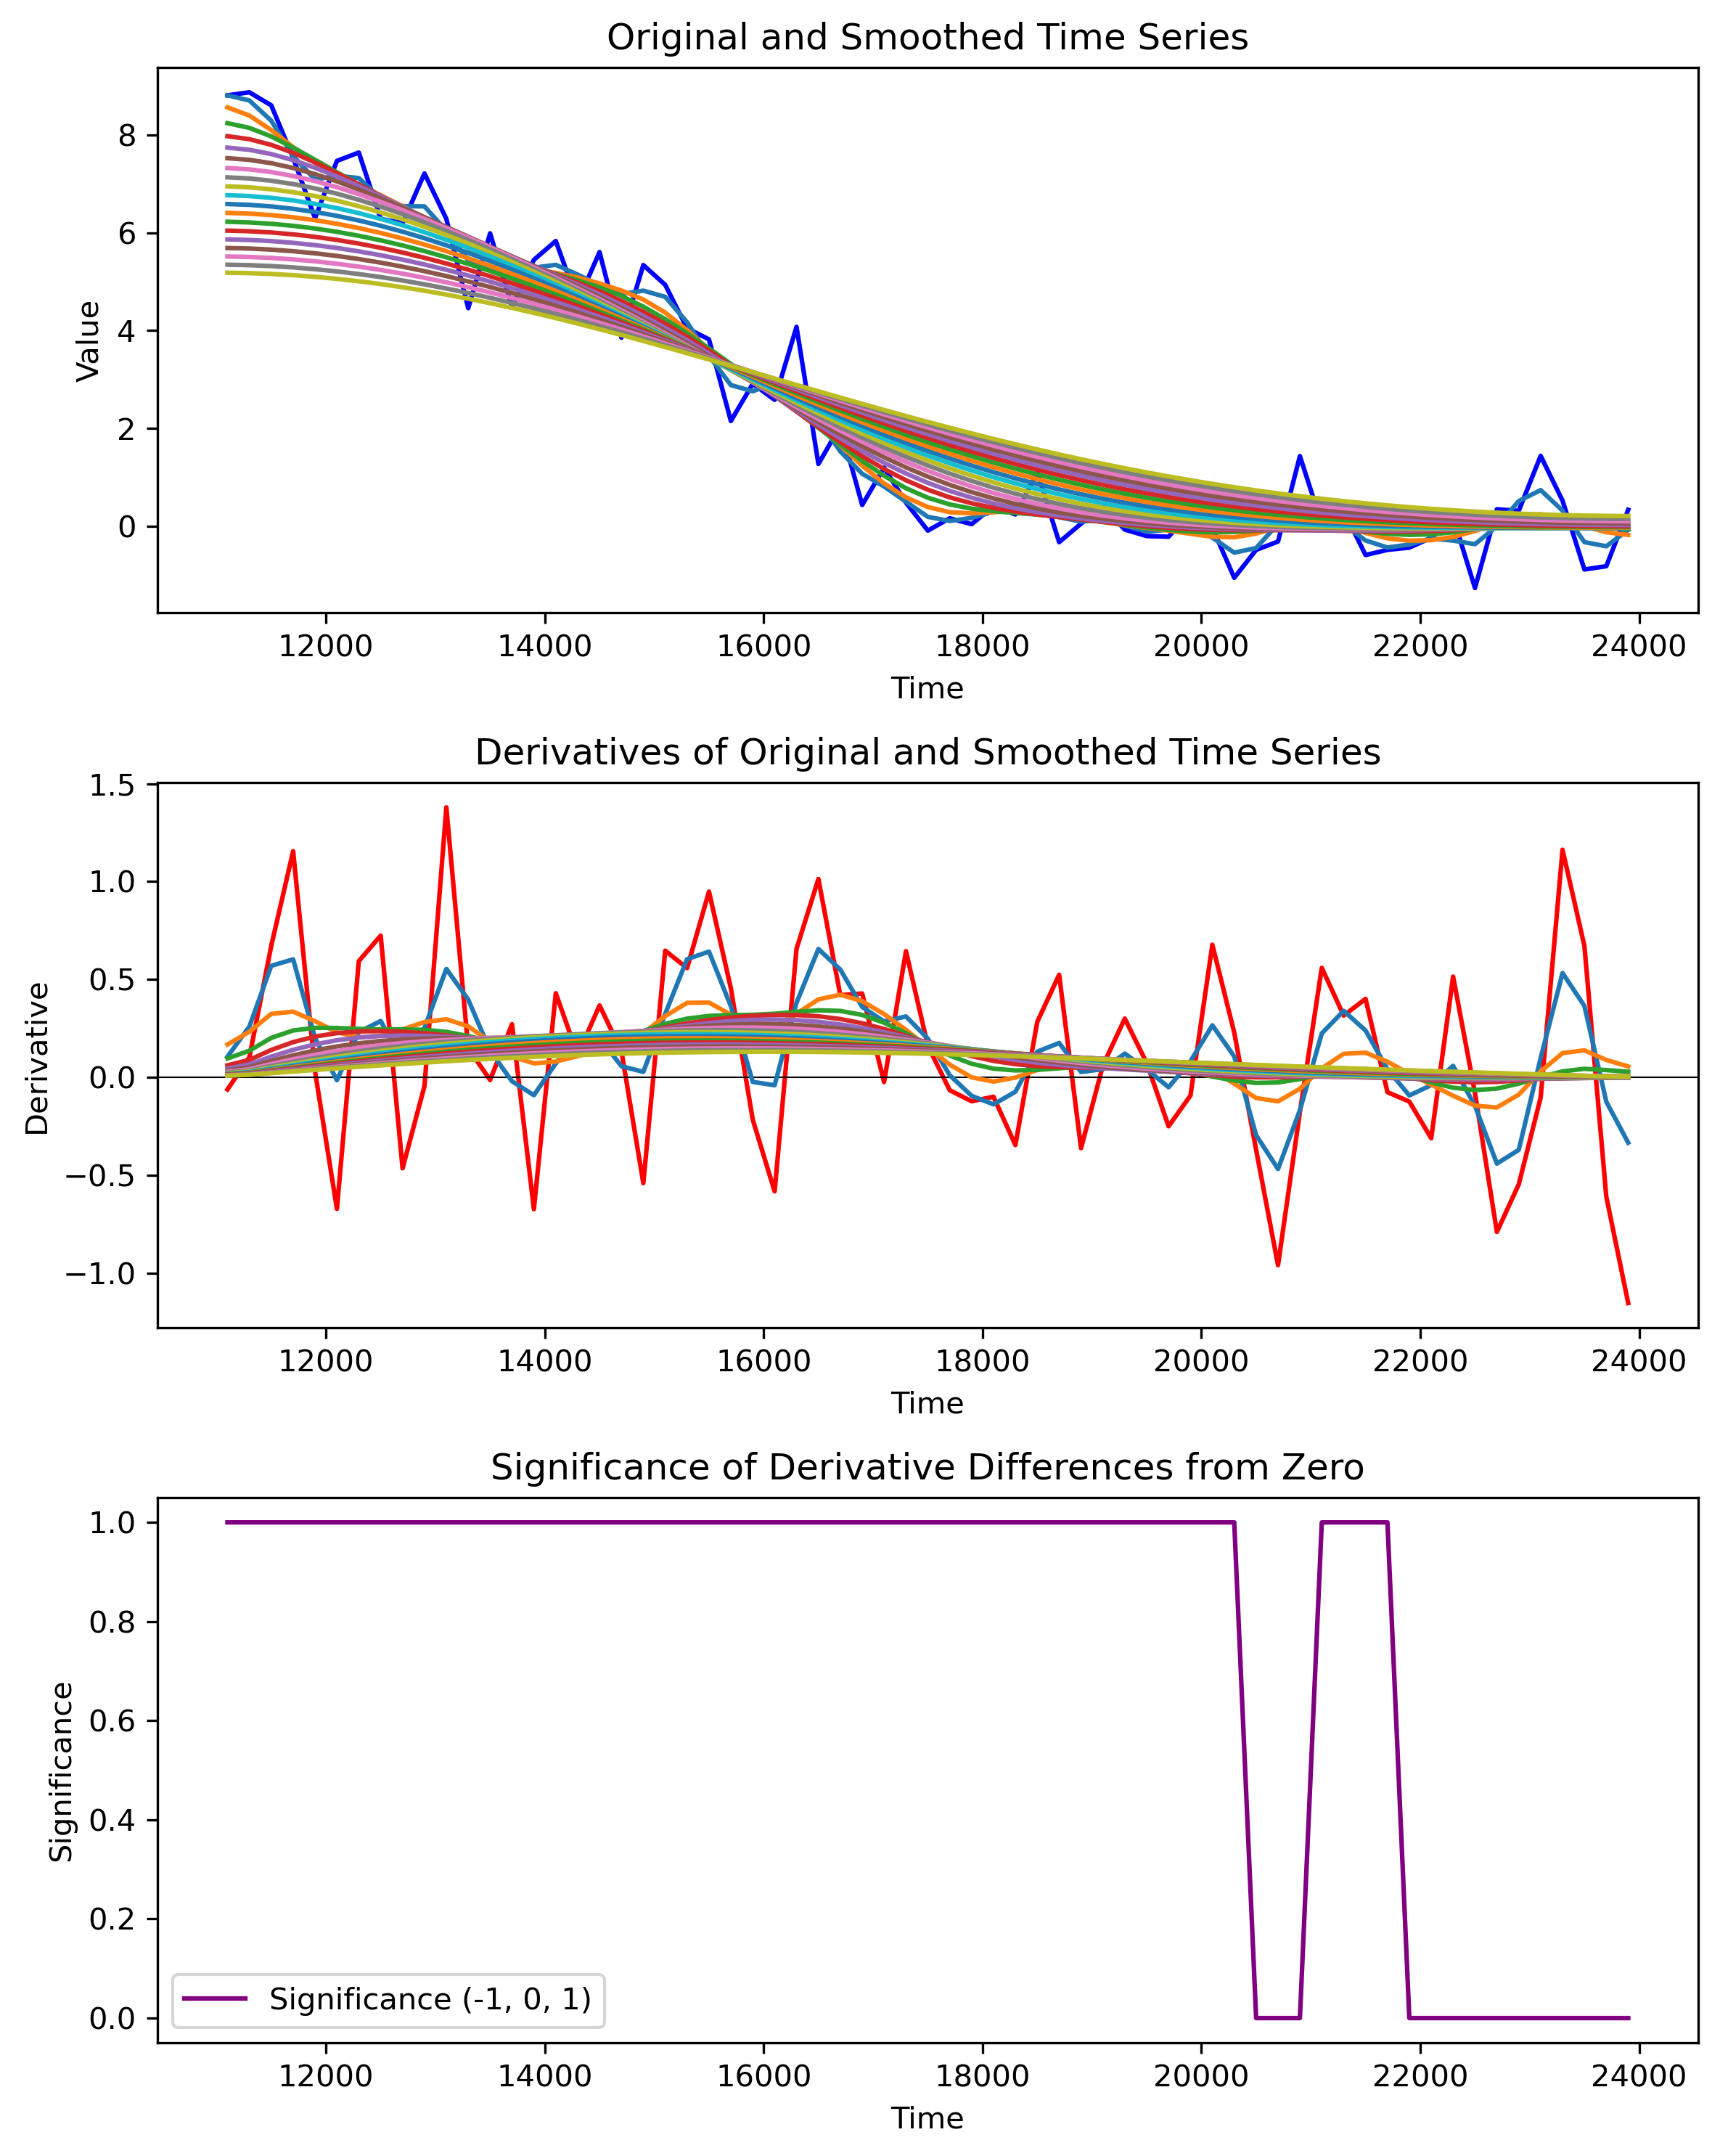

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import ttest_1samp

def smooth_gaussian(data, sigma):
    """
    Smooth a time series using a Gaussian kernel.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        sigma (float): The standard deviation for Gaussian kernel, determines the amount of smoothing.
        
    Returns:
        smoothed_data (ndarray): The smoothed time series data.
    """
    smoothed_data = gaussian_filter1d(data, sigma=sigma)
    return smoothed_data

time_series = weighted_avg_curves_k[0]
# Prepare to store derivatives for significance testing
derivatives_matrix = []

# Define sigma values for Gaussian smoothing
# sigmas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# create a sigma list from 1 to 64 with step 2
sigmas = list(range(1, 20, 1))

# Plot original time series and derivatives
plt.figure(figsize=(8, 10),dpi=300)

# Plot original time series
plt.subplot(3, 1, 1)
plt.plot(time, time_series, label='Original Time Series', color='blue')

# Plot smoothed time series for each sigma
for sigma in sigmas:
    smoothed_data = smooth_gaussian(time_series, sigma)
    plt.plot(time, smoothed_data, label=f'Smoothed (Sigma {sigma})')

plt.title('Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')


# Calculate derivative of original time series
original_derivative = np.gradient(time_series)*-1
# derivatives_matrix.append(original_derivative)

# Plot derivatives
plt.subplot(3, 1, 2)
plt.plot(time, original_derivative, label='Derivative (Original)', color='red')
plt.axhline(0, color='black', linewidth=0.5)

for sigma in sigmas:
    smoothed_data = smooth_gaussian(time_series, sigma)
    derivative = np.gradient(smoothed_data)*-1
    plt.plot(time, derivative, label=f'Derivative (Sigma {sigma})')
    derivatives_matrix.append(derivative)

plt.title('Derivatives of Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Derivative')
# plt.legend()

# Significance test for derivatives and create an array of significant values
significance_array = np.zeros_like(time_series)

# Transpose to get time-wise data (each row represents derivatives at a time point)
derivatives_matrix = np.array(derivatives_matrix).T

# Perform t-tests on each time point's derivatives
for i in range(len(derivatives_matrix)):
    _, p_value = ttest_1samp(derivatives_matrix[i], 0)
    if p_value < 0.05:
        mean_derivative = np.mean(derivatives_matrix[i])
        if mean_derivative < 0:
            significance_array[i] = -1
        elif mean_derivative > 0:
            significance_array[i] = 1

# Plot significance
plt.subplot(3, 1, 3)
plt.plot(time,significance_array, label='Significance (-1, 0, 1)', color='purple')
plt.title('Significance of Derivative Differences from Zero')
plt.xlabel('Time')
plt.ylabel('Significance')
plt.legend()

plt.tight_layout()
plt.show()


# Calculate the significance of the slope for ensemble data

In [58]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.stats import ttest_1samp

def smooth_gaussian(data, sigma):
    """
    Smooth a time series using a Gaussian kernel.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        sigma (float): The standard deviation for Gaussian kernel, determines the amount of smoothing.
        
    Returns:
        ndarray: The smoothed time series data.
    """
    smoothed_data = gaussian_filter1d(data, sigma=sigma)
    return smoothed_data

def analyze_significance(time_series_data, sigmas):
    """
    Analyze the significance of derivatives across multiple time series data with Gaussian smoothing.
    
    Parameters:
        time_series_data (list of ndarray): A list containing multiple time series data.
        sigmas (list of int): A list of sigma values for Gaussian smoothing.
    
    Returns:
        list of ndarray: A list of arrays where each array contains the significance coding (-1, 0, 1) for each time point.
    """
    all_significance_arrays = []
    
    for time_series in time_series_data:
        derivatives_matrix = []
        
        for sigma in sigmas:
            smoothed_data = smooth_gaussian(time_series, sigma)
            derivative = np.gradient(smoothed_data) * -1
            derivatives_matrix.append(derivative)
        
        derivatives_matrix = np.array(derivatives_matrix).T
        significance_array = np.zeros_like(time_series)
        
        for i in range(len(derivatives_matrix)):
            _, p_value = ttest_1samp(derivatives_matrix[i], 0)
            if p_value < 0.05:
                mean_derivative = np.mean(derivatives_matrix[i])
                if mean_derivative < 0:
                    significance_array[i] = -1
                elif mean_derivative > 0:
                    significance_array[i] = 1
        
        all_significance_arrays.append(significance_array)
    
    return all_significance_arrays



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap




# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap

# def plot_significance_map(significance_arrays, time_range, ensemble_count, figsize=(6, 4.5), dpi=300, if_colorbar=True):
#     """
#     Plots a 2D color map of significance results for multiple time series.
    
#     Parameters:
#         significance_arrays (list of ndarray): A list of arrays containing significance values for each time series.
#         time_range (tuple): A tuple (min_time, max_time) defining the extent of the time dimension.
#         ensemble_count (int): The number of time series (ensemble members).
#         figsize (tuple): The dimensions of the figure to be plotted.
#         dpi (int): The resolution of the figure in dots per inch.
#     """
#     # Create a copy of the input array to avoid modifying the original data
#     modified_arrays = np.array(significance_arrays).copy()
    
#     # Replace -1 with 0 in the array
#     modified_arrays[modified_arrays == -1] = 0

#     # Define custom colormap
#     colors = ['green', 'orange']  # Green for 0, orange for 1
#     cmap = ListedColormap(colors)

#     # Setup the plot
#     plt.figure(figsize=figsize, dpi=dpi)
#     img = plt.imshow(modified_arrays, aspect='auto', cmap=cmap, extent=[time_range[0], time_range[1], 0, ensemble_count], vmin=0, vmax=1)
    
#     if if_colorbar:
#         # Set colorbar with ticks and labels adjusted for middle alignment
#         cbar = plt.colorbar(img, ticks=[0.25, 0.75], label='Significance (0, 1)')
#         cbar.set_ticklabels(['0', '1'])

    
#     plt.xlabel('Age (yr BP)')
#     plt.ylabel('Ensemble Member')
#     plt.tight_layout()
#     plt.show()


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_significance_map_with_curve(significance_arrays, time_range, ensemble_count, figsize=(6, 6), dpi=300, if_colorbar=True):
    """
    Plots a 2D color map of significance results for multiple time series and a separate subplot showing the percentage of data
    that got a significant level of 1.
    
    Parameters:
        significance_arrays (list of ndarray): A list of arrays containing significance values for each time series.
        time_range (tuple): A tuple (min_time, max_time) defining the extent of the time dimension.
        ensemble_count (int): The number of time series (ensemble members).
        figsize (tuple): The dimensions of the figure to be plotted.
        dpi (int): The resolution of the figure in dots per inch.
    """
    # Calculate the proportion of '1' values for each time point
    percentage_significant = np.mean(np.array(significance_arrays) == 1, axis=0) * 100


    # Setup the figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, dpi=dpi, gridspec_kw={'height_ratios': [1, 6]})

    # Plot the percentage curve
    time_axis = np.linspace(time_range[0], time_range[1], len(percentage_significant))
    ax1.plot(time_axis, percentage_significant, color='blue', linewidth=2)
    # # for time between 16000 to 22000, find the time where y is most close to 50 and plot a red dot
    # time_50 = time_axis[np.argmin(np.abs(percentage_significant - 50))]
    # ax1.plot(time_50, 50, 'ro')

    # Limiting the search for time_50 between 16000 and 22000
    # limited_indices = np.where((time_axis >= 16000) & (time_axis <= 22000))[0]
    # if limited_indices.size > 0:
    #     index_50 = limited_indices[np.argmin(np.abs(percentage_significant[limited_indices] - 50))]
    #     ax1.plot(time_axis[index_50], percentage_significant[index_50], 'ro', label='50% Significance (16000-22000)')
        # ax1.legend()

    # randomly select 10 records from significance_arrays and claculate the mean of the selected records, repead this for 10 times and find the time_50
    significance_matrix = np.array(significance_arrays)
    time_50_mc = []
    for i in range(20):
        selected_indices = np.random.choice(significance_matrix.shape[0], 50, replace=False)
        selected_records = significance_matrix[selected_indices, :]
        mean_selected_records = np.mean(selected_records == 1, axis=0) * 100
        limited_mc_indices = np.where((time_axis >= 16000) & (time_axis <= 22000))[0]
        if limited_mc_indices.size > 0:
            index_50_mc = limited_mc_indices[np.argmin(np.abs(mean_selected_records[limited_mc_indices] - 50))]
            time_50_mc.append(time_axis[index_50_mc])
            # ax1.plot(time_axis[index_50_mc], mean_selected_records[index_50_mc], 'gx')


    # for time_50_mc calculate the 5th and 95th percentile, plot eror bar at time_50 with xerr=[5th, 95th]
    time_50_mc = np.array(time_50_mc)
    if time_50_mc.size > 0:
        time_50_mc_5th = np.percentile(time_50_mc, 5)
        time_50_mc_95th = np.percentile(time_50_mc, 95)
        ax1.errorbar(np.mean(time_50_mc), 50, xerr=[[np.mean(time_50_mc) - time_50_mc_5th], [time_50_mc_95th - np.mean(time_50_mc)]], fmt='ro', markersize=3, label='50% Significance (MC)')

    # print the mean and 5th and 95th percentile of time_50_mc
    print(f'Mean of time_50_mc: {np.mean(time_50_mc)}')
    print(f'5th percentile of time_50_mc: {time_50_mc_5th}')
    print(f'95th percentile of time_50_mc: {time_50_mc_95th}')

    # set x lim
    ax1.set_xlim(time_range)
    # show x ticks and xticklabels on top instead of bottom
    # ax1.xaxis.tick_top()
    # # turn off the xticklabels on top
    # ax1.xaxis.set_tick_params(labeltop=False)
    # # set y

    # set x and y ticks and ticklaabels to invisible
    ax1.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
    # ax1.tick_params(axis='y', which='both', right=True, left=False, labelleft=False)
    # set y tick labels
    ax1.set_yticks([0, 100])
    ax1.set_yticklabels(['0%', '100%'])

    
    # ax1.set_ylabel('Percentage (%)')
    # ax1.set_title('Percentage of Significance Level 1')
    # ax1.grid(True)

    # Plot the 2D color map
    colors = ['steelblue', 'lightcoral']  # Green for 0, orange for 1
    cmap = ListedColormap(colors)
    img = ax2.imshow(np.array(significance_arrays), aspect='auto', cmap=cmap, extent=[time_range[0], time_range[1], 0, ensemble_count], vmin=0, vmax=1)
    if if_colorbar:
        cbar = plt.colorbar(img, ax=ax2, ticks=[0.25, 0.75], label='Significance (0, 1)')
        cbar.set_ticklabels(['0', '1'])
    ax2.set_xlabel('Time (yr BP)')
    ax2.set_ylabel('Ensemble Member')
    # ax2.set_title('Significance Map')

    # plt.tight_layout()
    # adjust the space between two subplots
    plt.subplots_adjust(hspace=0.1)
    plt.show()


Mean of time_50_mc: 21480.0
5th percentile of time_50_mc: 21300.0
95th percentile of time_50_mc: 21710.0


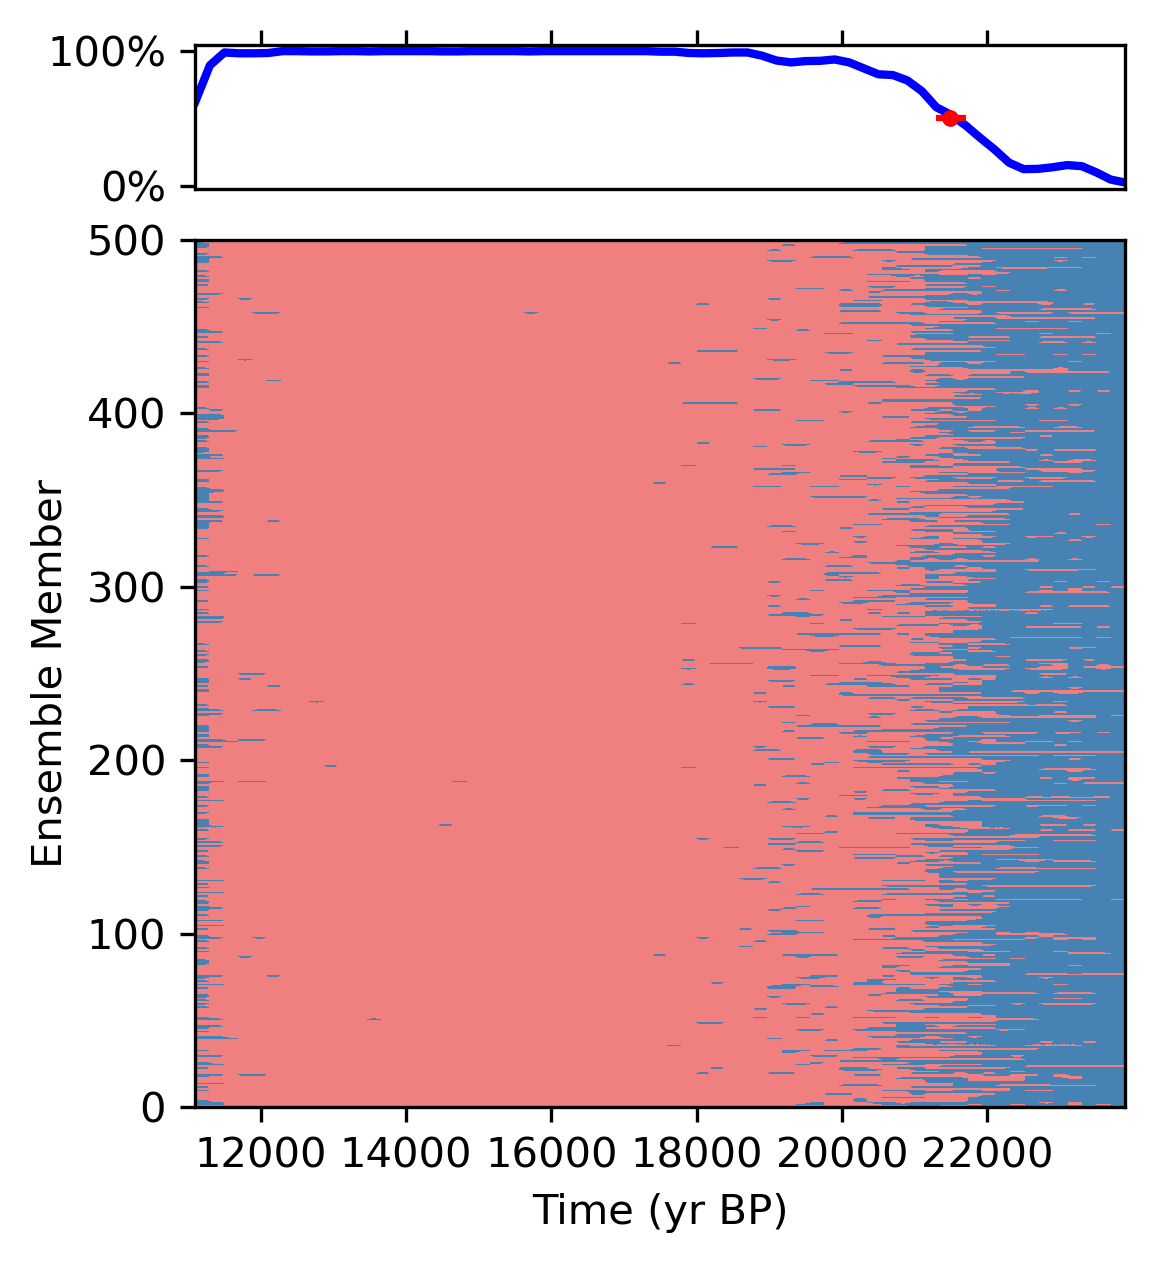

In [59]:
weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map_with_curve(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k), figsize=(4, 4.6),if_colorbar=False)

Mean of time_50_mc: 17230.0
5th percentile of time_50_mc: 17100.0
95th percentile of time_50_mc: 17300.0


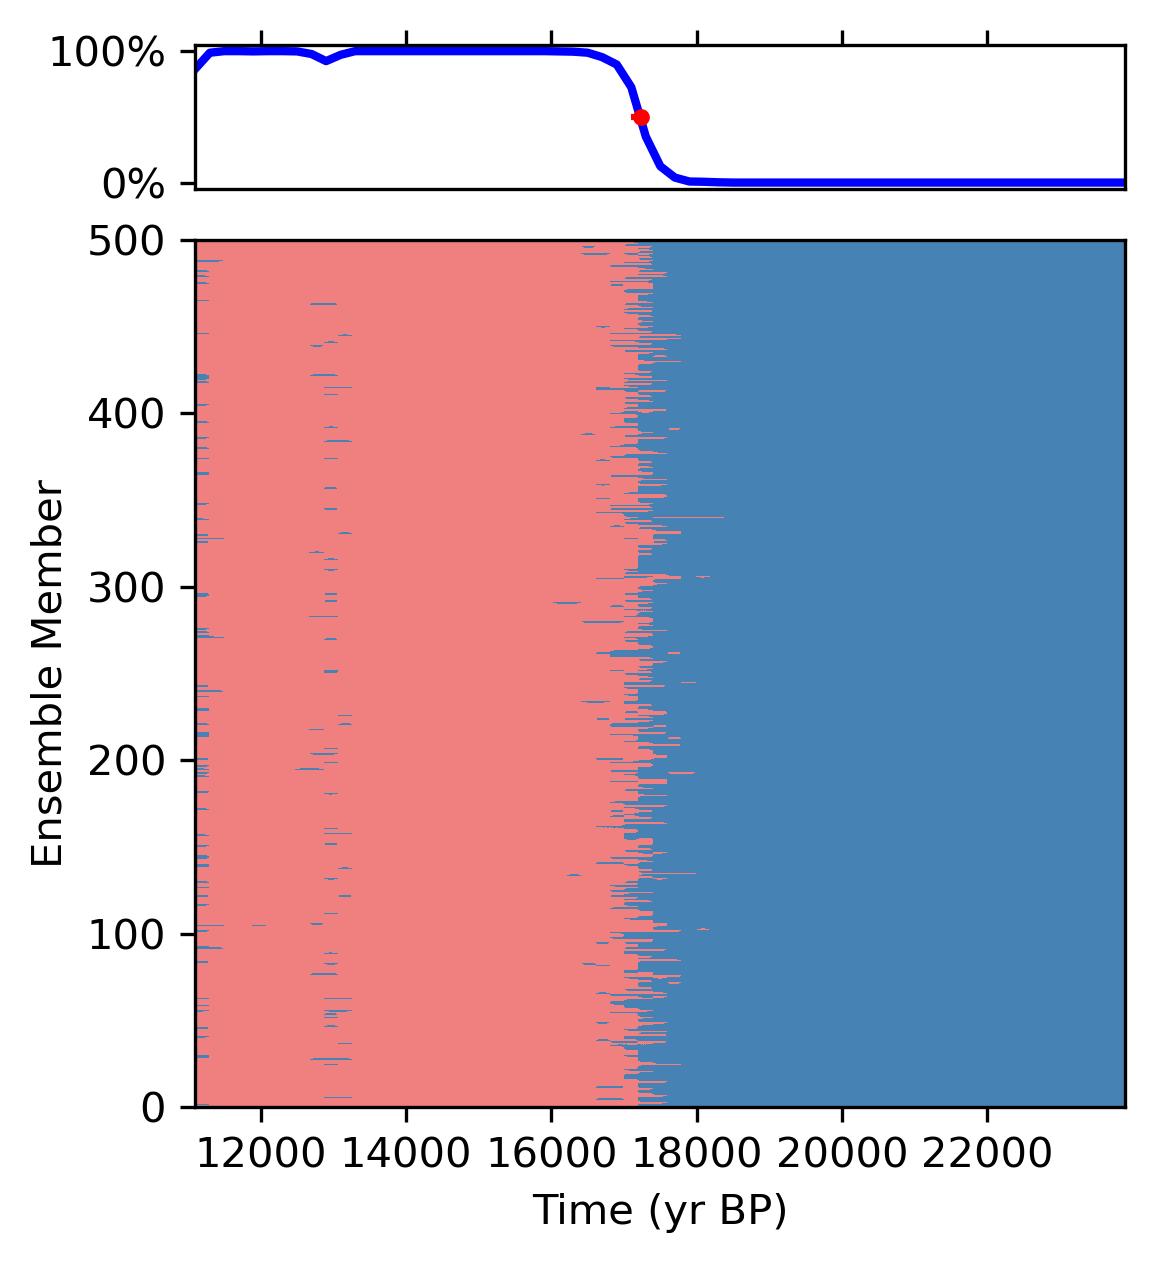

In [60]:
weighted_avg_curves_k = [curves[1] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map_with_curve(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k), figsize=(4, 4.6),if_colorbar=False)

Mean of time_50_mc: 20080.0
5th percentile of time_50_mc: 19900.0
95th percentile of time_50_mc: 20300.0


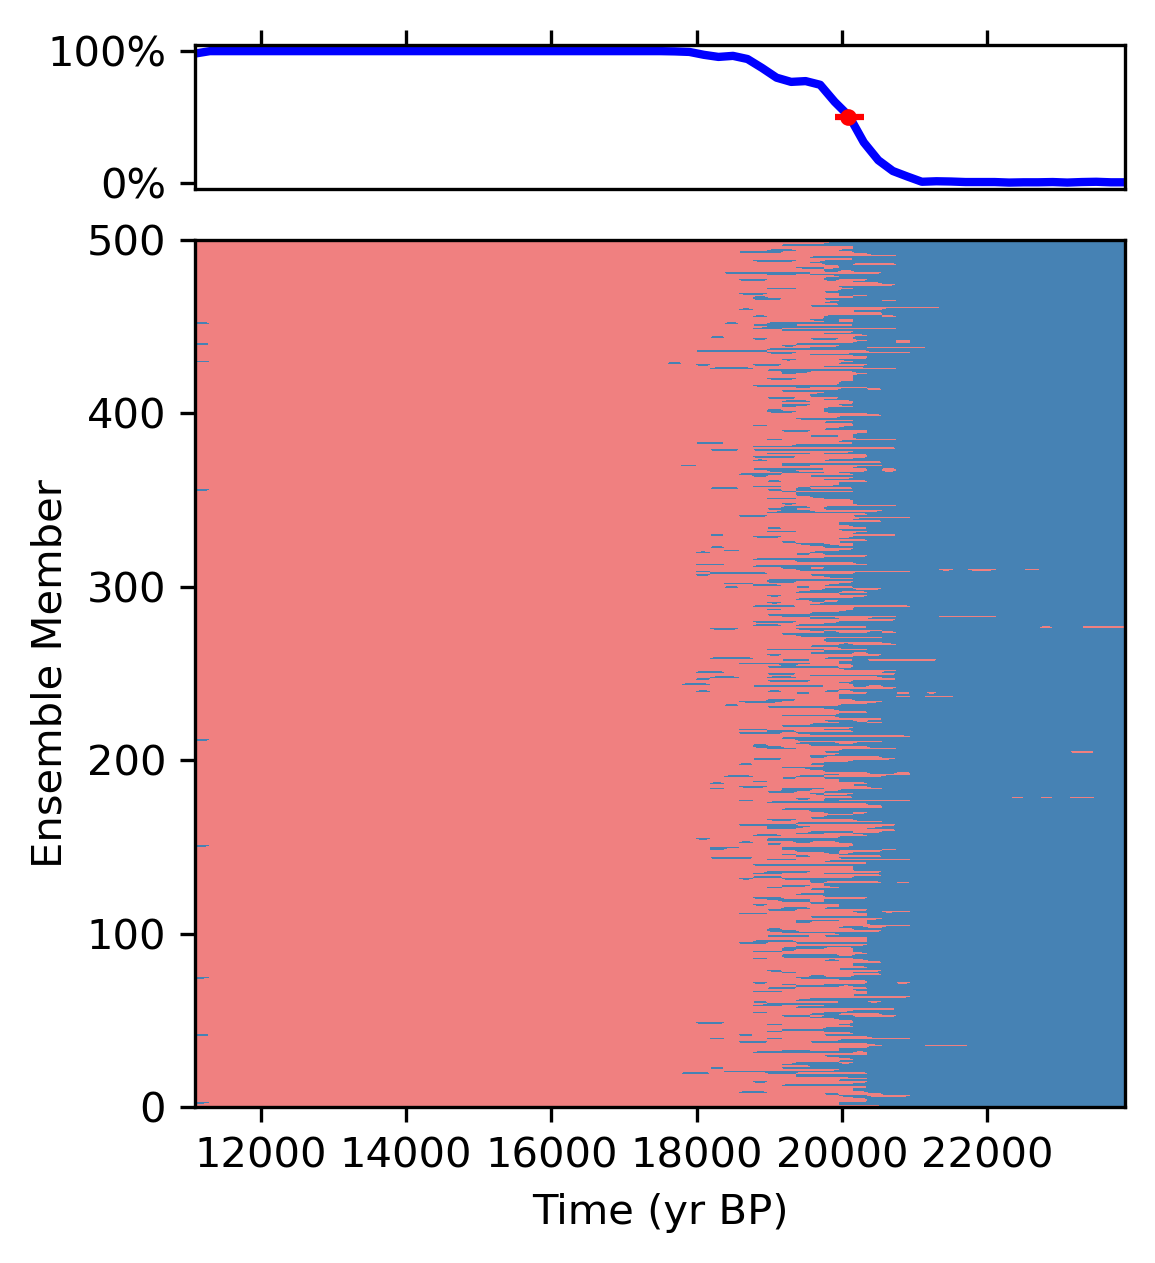

In [61]:
weighted_avg_curves_k = [curves[2] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map_with_curve(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k), figsize=(4, 4.6),if_colorbar=False)

Mean of time_50_mc: 18040.0
5th percentile of time_50_mc: 17900.0
95th percentile of time_50_mc: 18110.0


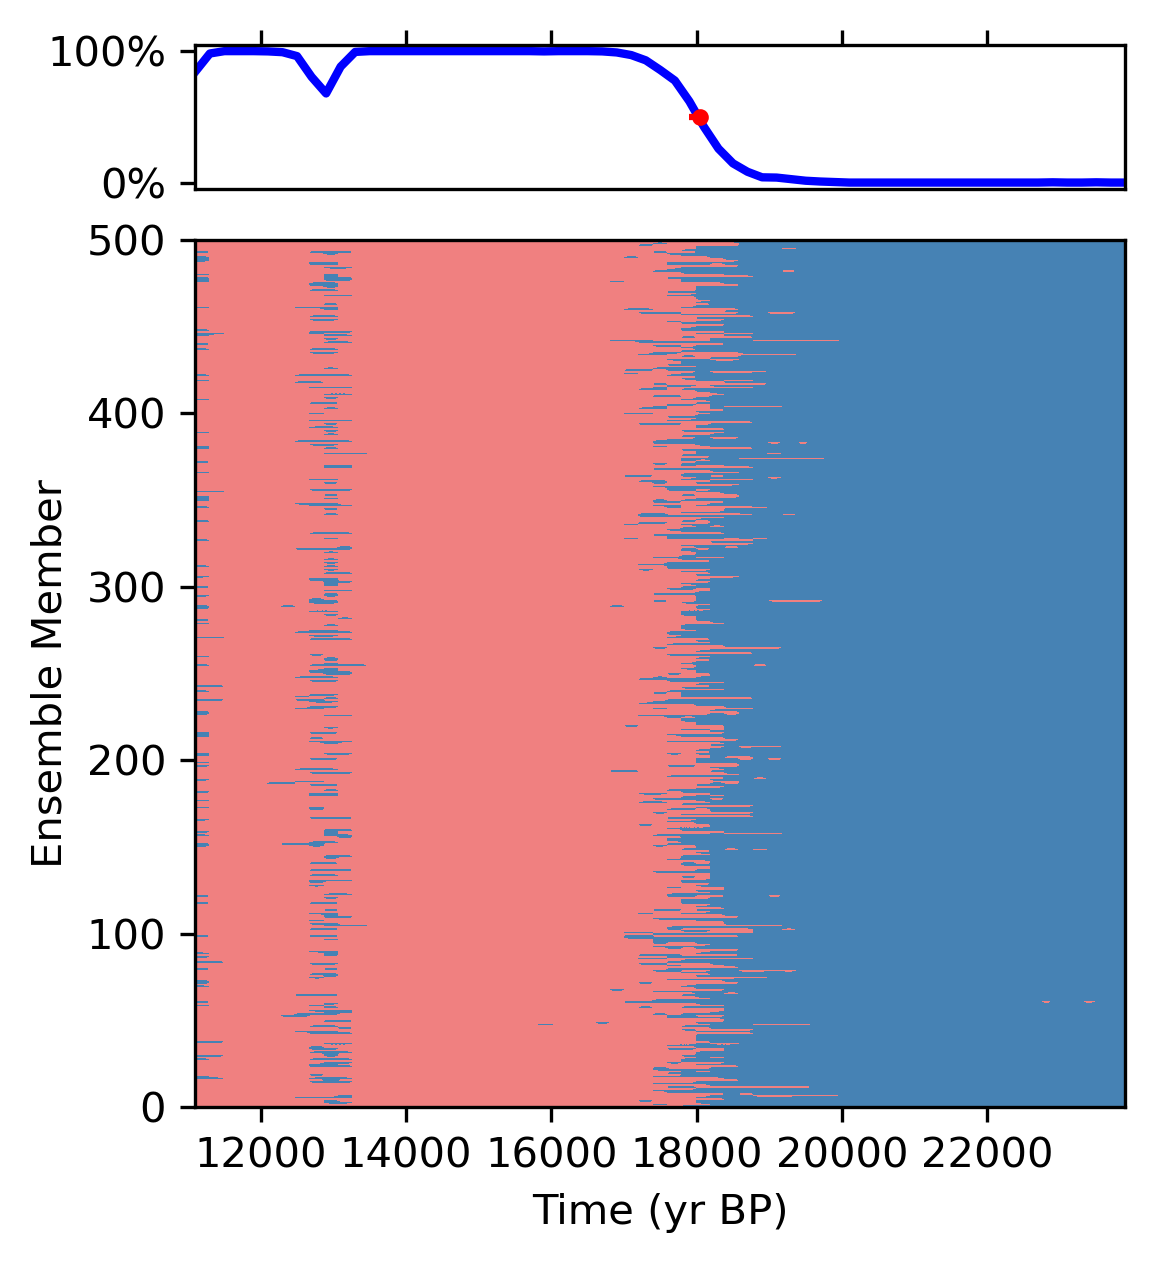

In [62]:
weighted_avg_curves_k = [curves[3] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map_with_curve(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k), figsize=(4, 4.6),if_colorbar=False)

Mean of time_50_mc: 18010.0
5th percentile of time_50_mc: 17900.0
95th percentile of time_50_mc: 18100.0


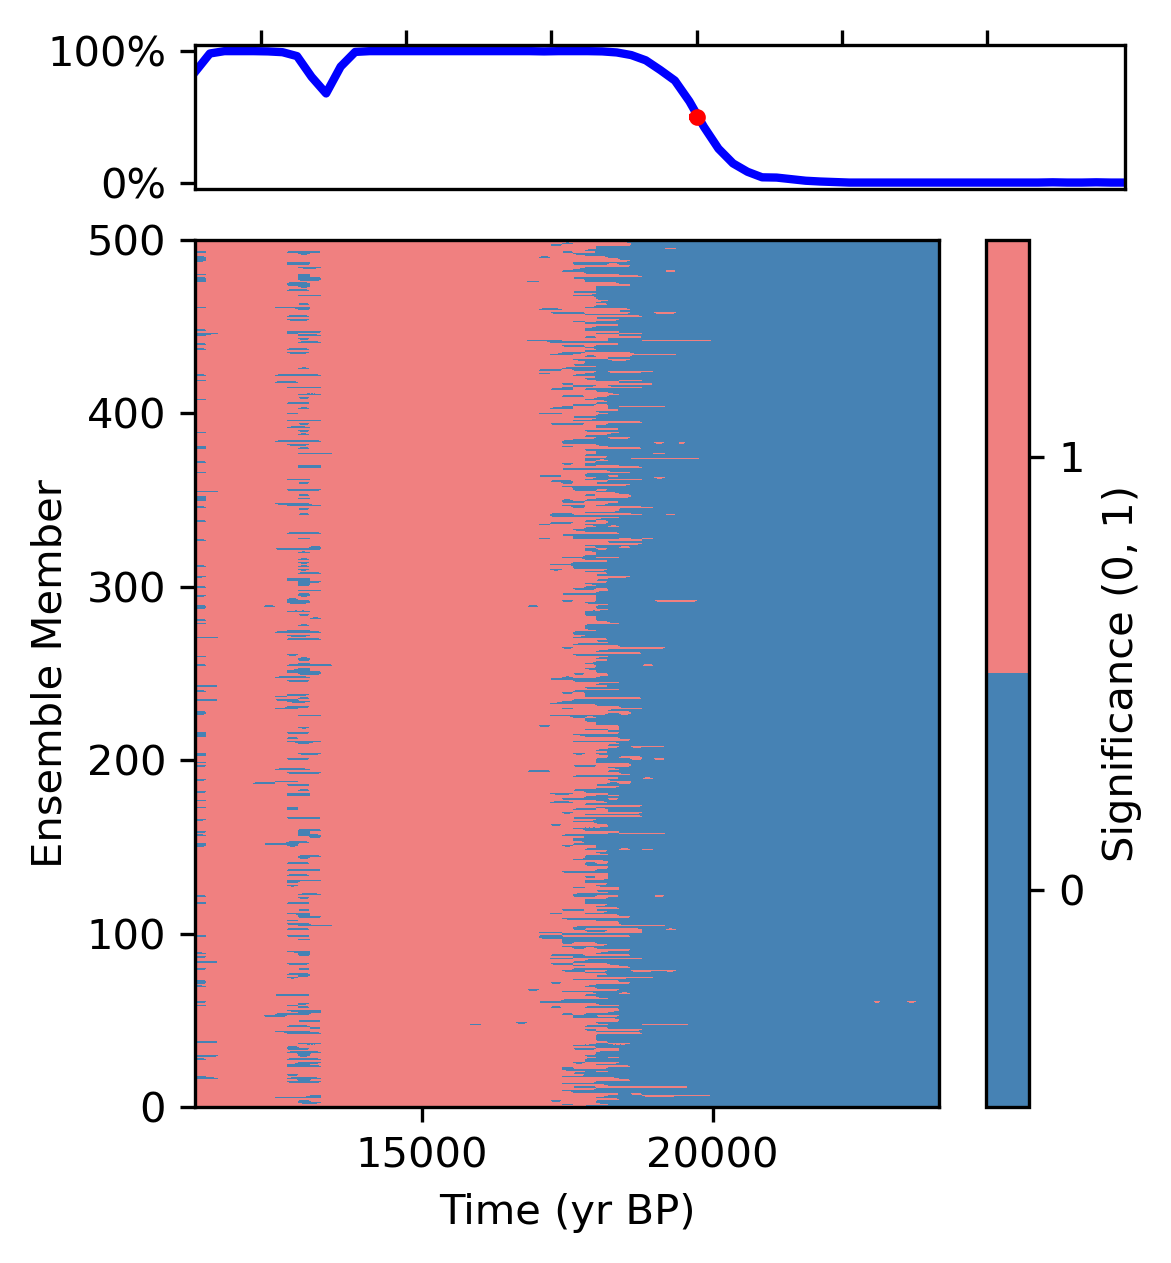

In [63]:
plot_significance_map_with_curve(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k), figsize=(4, 4.6),if_colorbar=True)

In [27]:
weighted_avg_curves_k[0].shape

(65,)

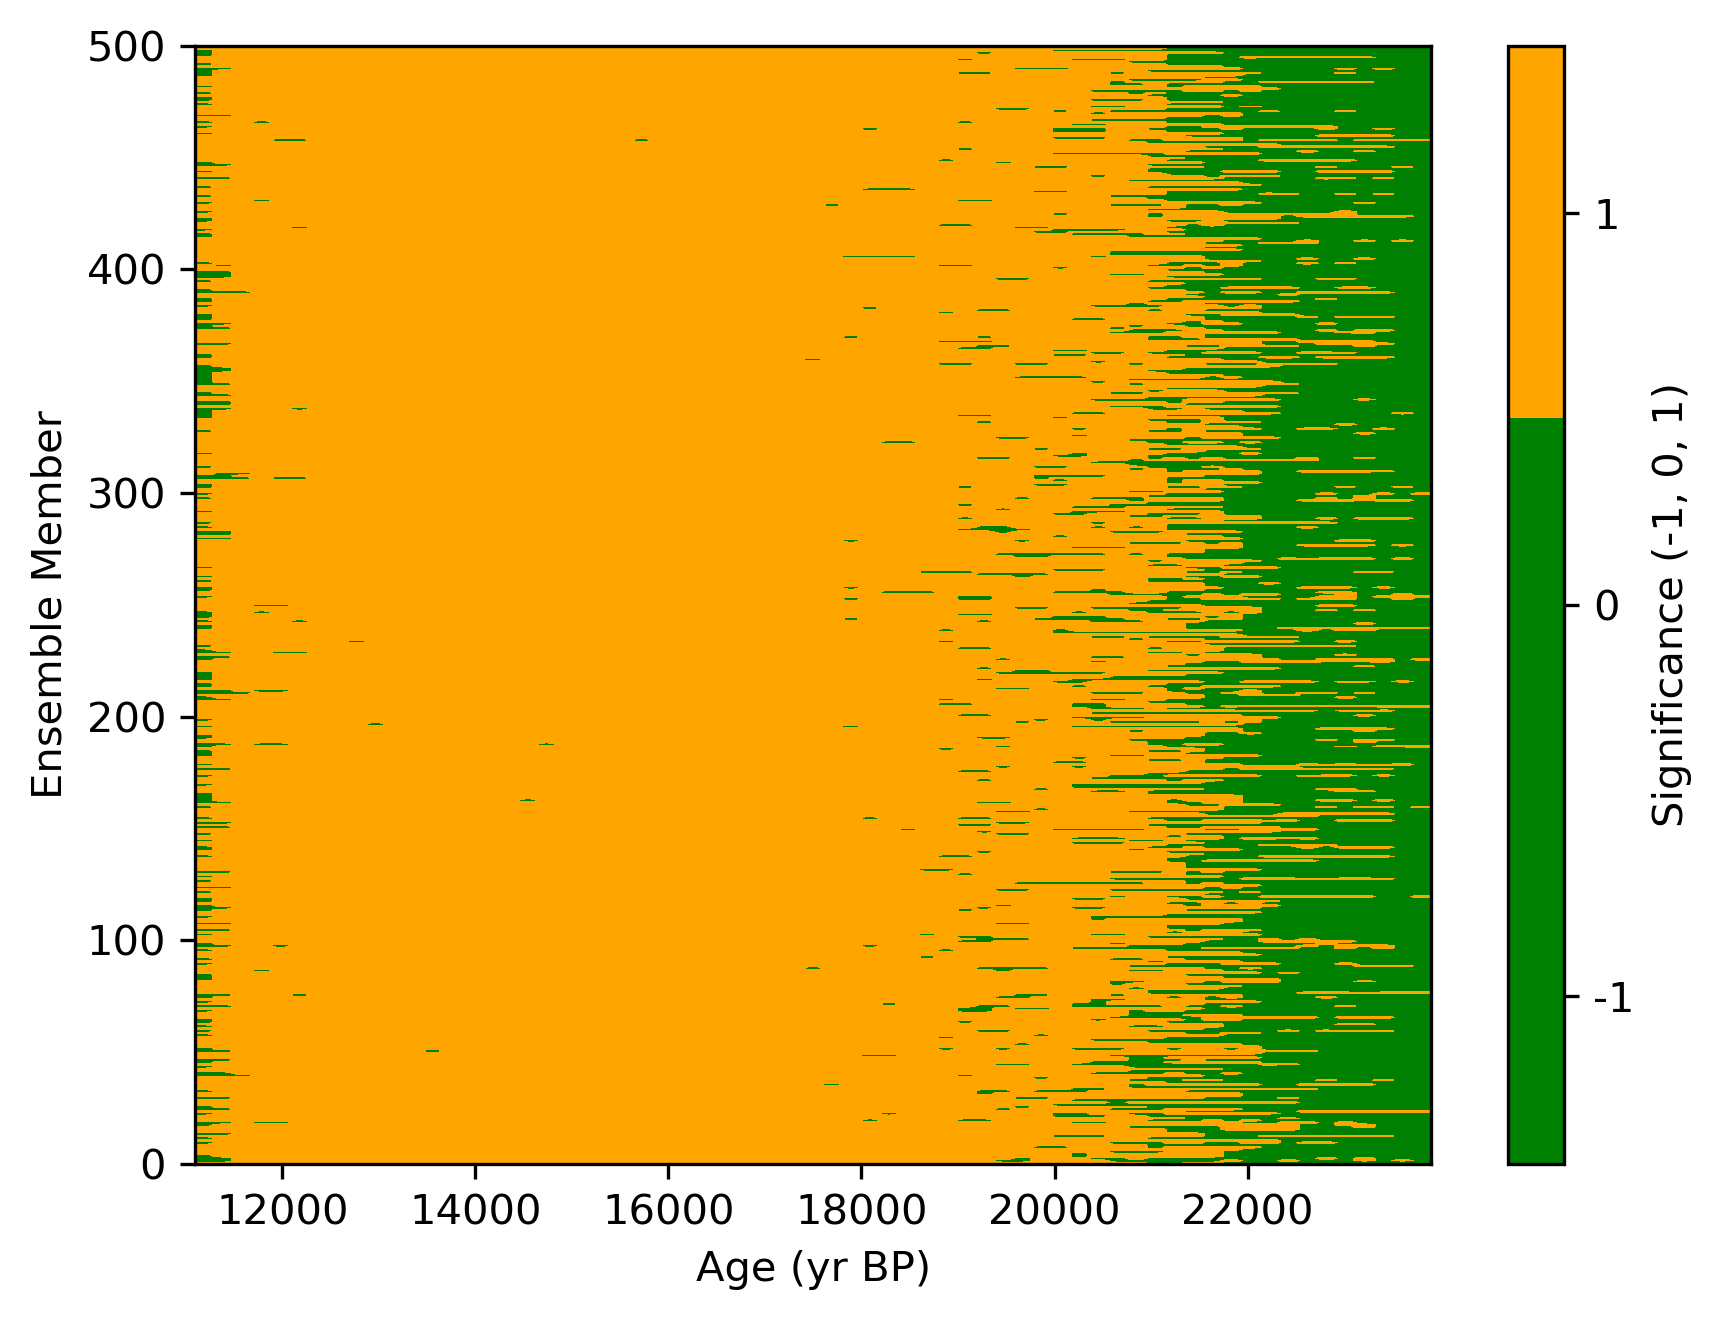

In [9]:
weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k))

In [83]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.stats import ttest_1samp

def smooth_gaussian(data, sigma):
    """
    Smooth a time series using a Gaussian kernel.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        sigma (float): The standard deviation for Gaussian kernel, determines the amount of smoothing.
        
    Returns:
        ndarray: The smoothed time series data.
    """
    smoothed_data = gaussian_filter1d(data, sigma=sigma)
    return smoothed_data

def analyze_significance(time_series_data, sigmas):
    """
    Analyze the significance of derivatives across multiple time series data with Gaussian smoothing.
    
    Parameters:
        time_series_data (list of ndarray): A list containing multiple time series data.
        sigmas (list of int): A list of sigma values for Gaussian smoothing.
    
    Returns:
        list of ndarray: A list of arrays where each array contains the significance coding (-1, 0, 1) for each time point.
    """
    all_significance_arrays = []
    
    for time_series in time_series_data:
        derivatives_matrix = []
        
        for sigma in sigmas:
            smoothed_data = smooth_gaussian(time_series, sigma)
            derivative = np.gradient(smoothed_data) * -1
            derivatives_matrix.append(derivative)
        
        derivatives_matrix = np.array(derivatives_matrix).T
        significance_array = np.zeros_like(time_series)
        
        for i in range(len(derivatives_matrix)):
            _, p_value = ttest_1samp(derivatives_matrix[i], 0)
            if p_value < 0.05:
                mean_derivative = np.mean(derivatives_matrix[i])
                if mean_derivative < 0:
                    significance_array[i] = -1
                elif mean_derivative > 0:
                    significance_array[i] = 1
        
        all_significance_arrays.append(significance_array)
    
    return all_significance_arrays



import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_significance_map(significance_arrays, time_range, ensemble_count, figsize=(6, 4.5), dpi=300):
    """
    Plots a 2D color map of significance results for multiple time series.
    
    Parameters:
        significance_arrays (list of ndarray): A list of arrays containing significance values for each time series.
        time_range (tuple): A tuple (min_time, max_time) defining the extent of the time dimension.
        ensemble_count (int): The number of time series (ensemble members).
        figsize (tuple): The dimensions of the figure to be plotted.
        dpi (int): The resolution of the figure in dots per inch.
    """
    # Define custom colormap
    colors = ['cyan', 'green', 'orange']  # Feel free to adjust colors
    cmap = ListedColormap(colors)
    
    plt.figure(figsize=figsize, dpi=dpi)
    img = plt.imshow(significance_arrays, aspect='auto', cmap=cmap, extent=[time_range[0], time_range[1], 0, ensemble_count], vmin=-1, vmax=1)
    
    # Set colorbar with ticks and labels adjusted for middle alignment
    cbar = plt.colorbar(img, ticks=[-0.7, 0, 0.7], label='Significance (-1, 0, 1)')
    cbar.set_ticklabels(['-1', '0', '1'])
    
    plt.xlabel('Age (yr BP)')
    plt.ylabel('Ensemble Member')
    plt.tight_layout()
    plt.show()



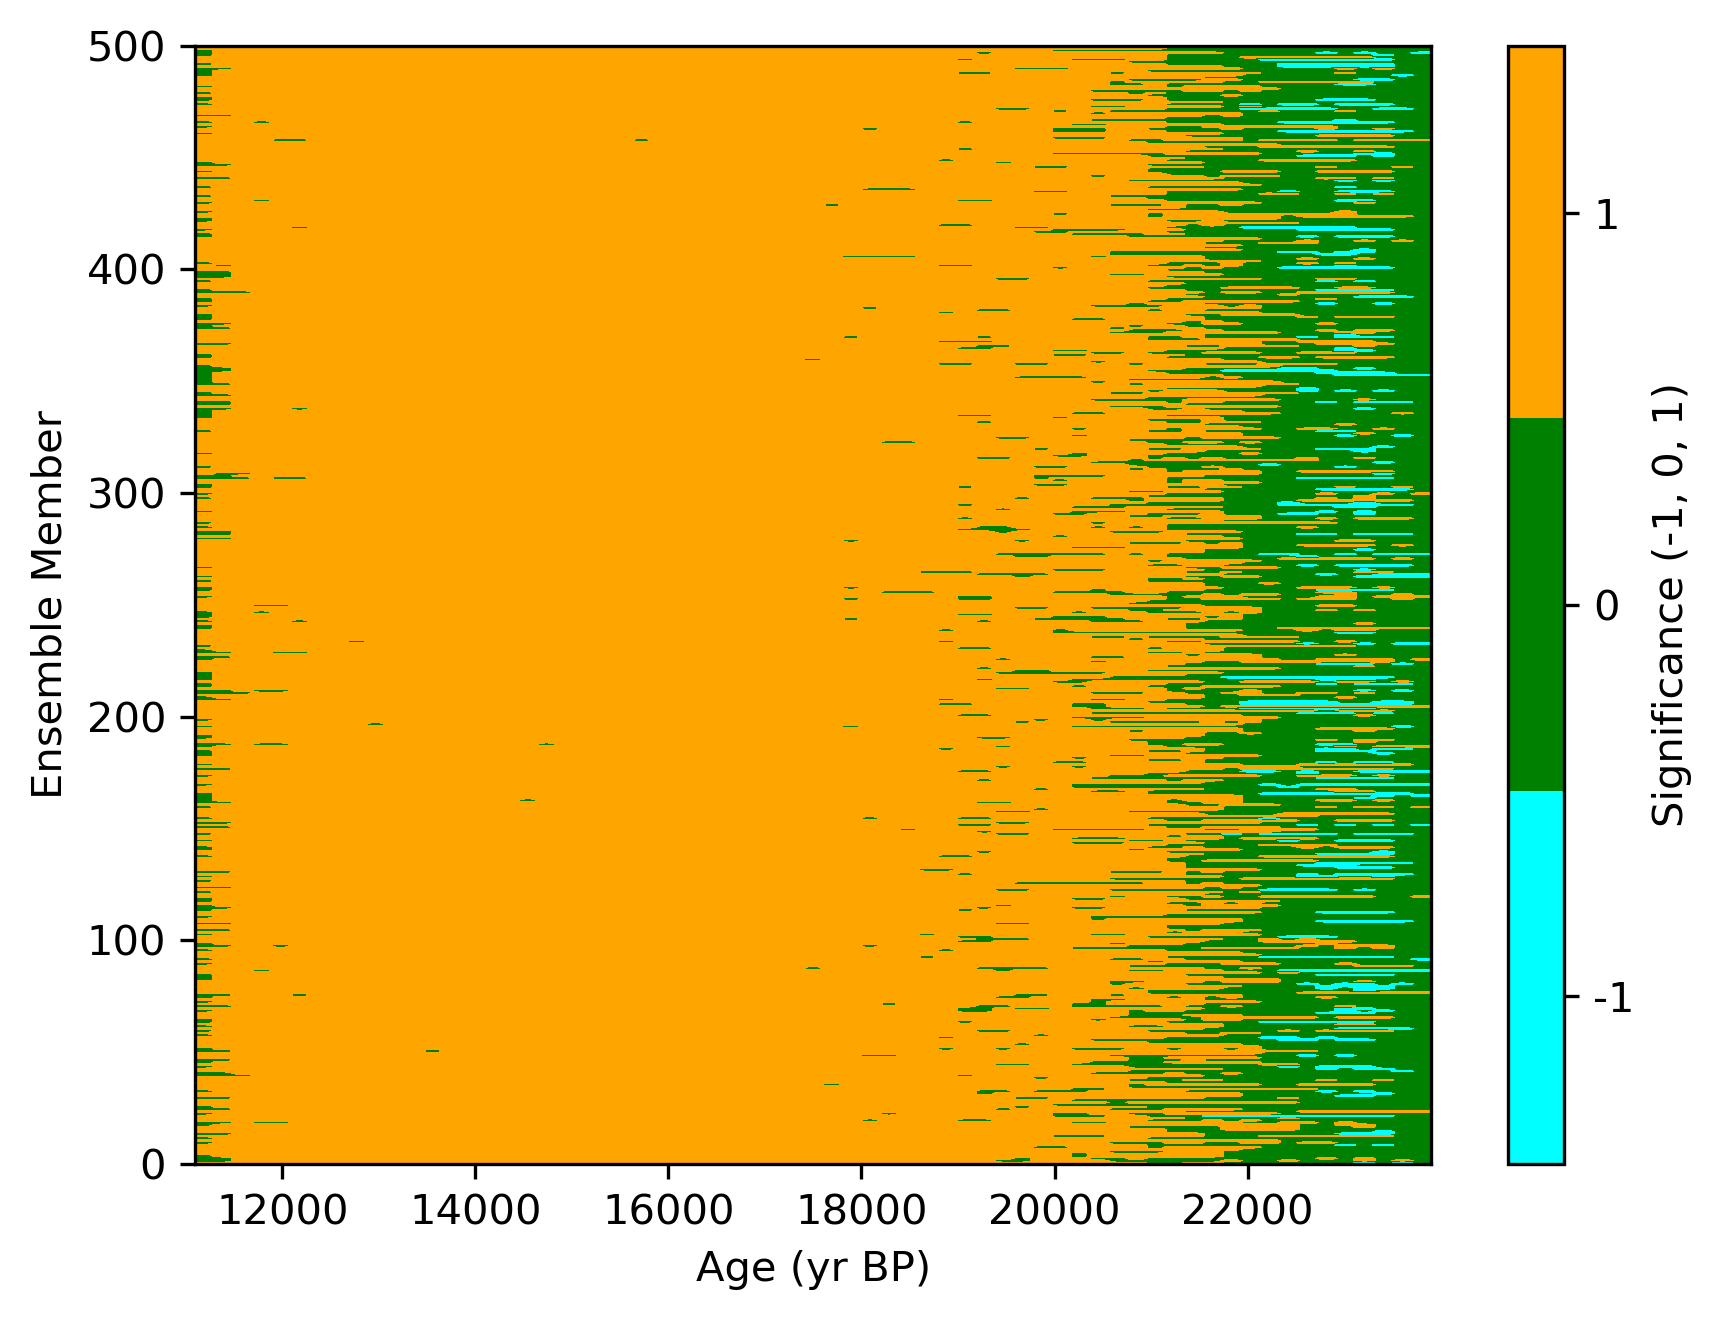

In [84]:
weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k))

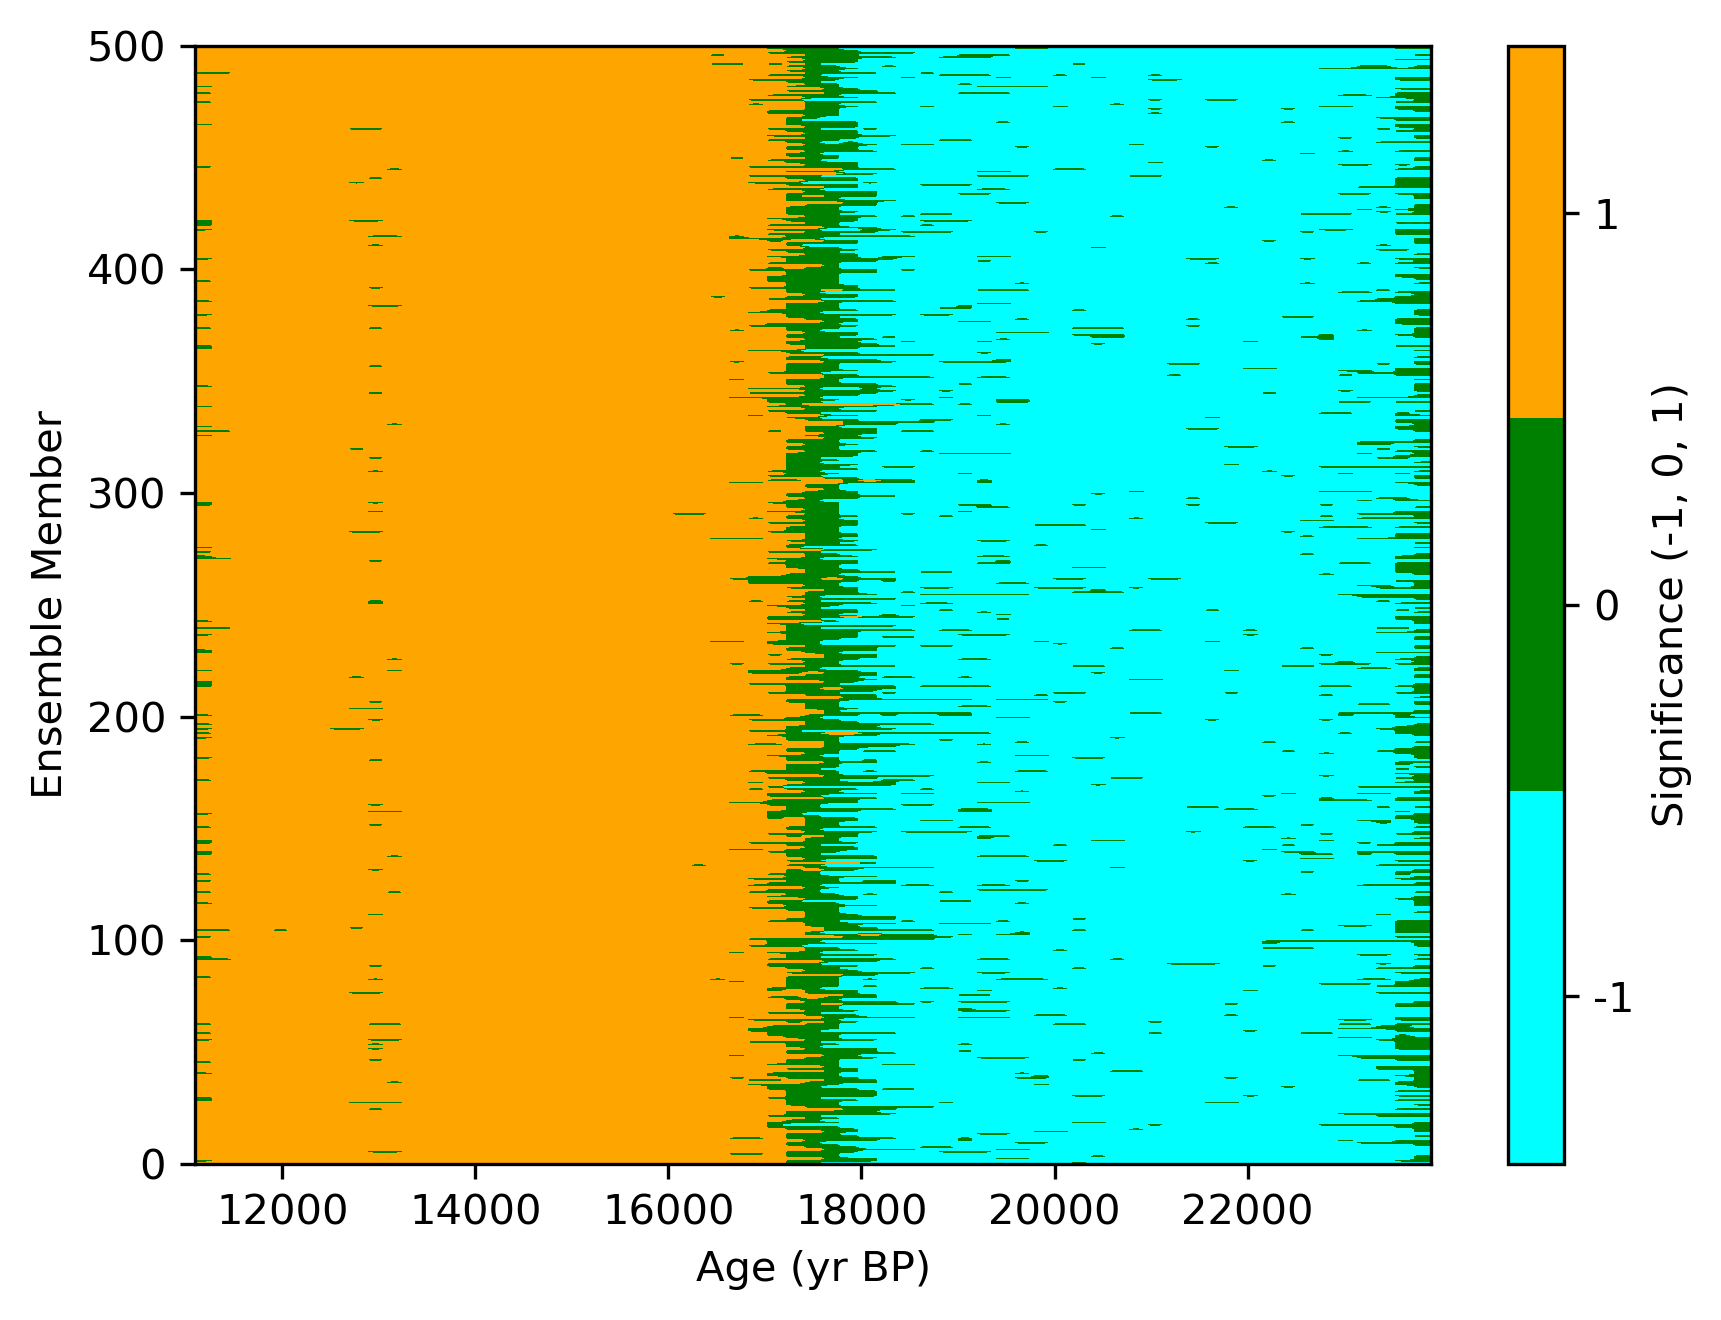

In [87]:
weighted_avg_curves_k = [curves[1] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k))

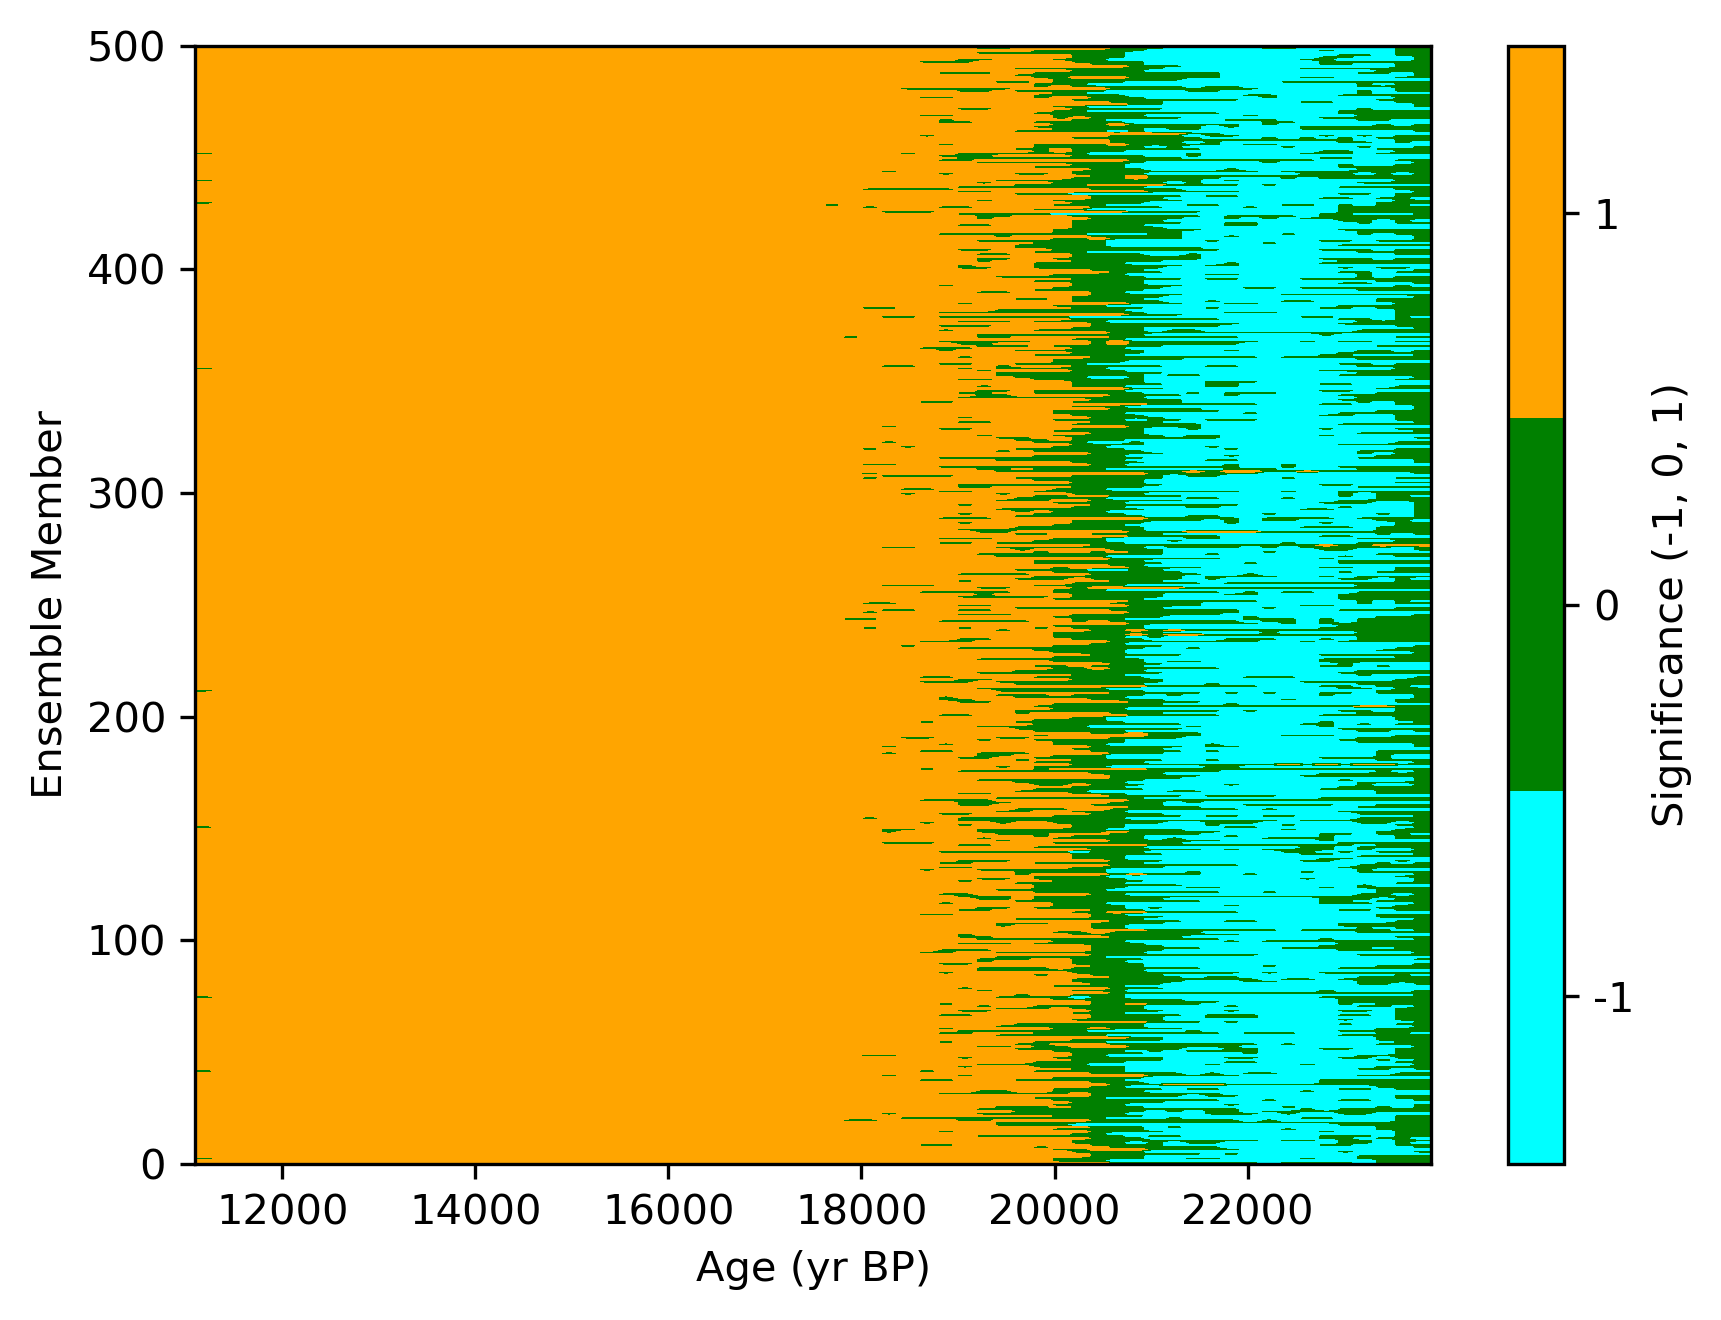

In [90]:
weighted_avg_curves_k = [curves[2] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k))

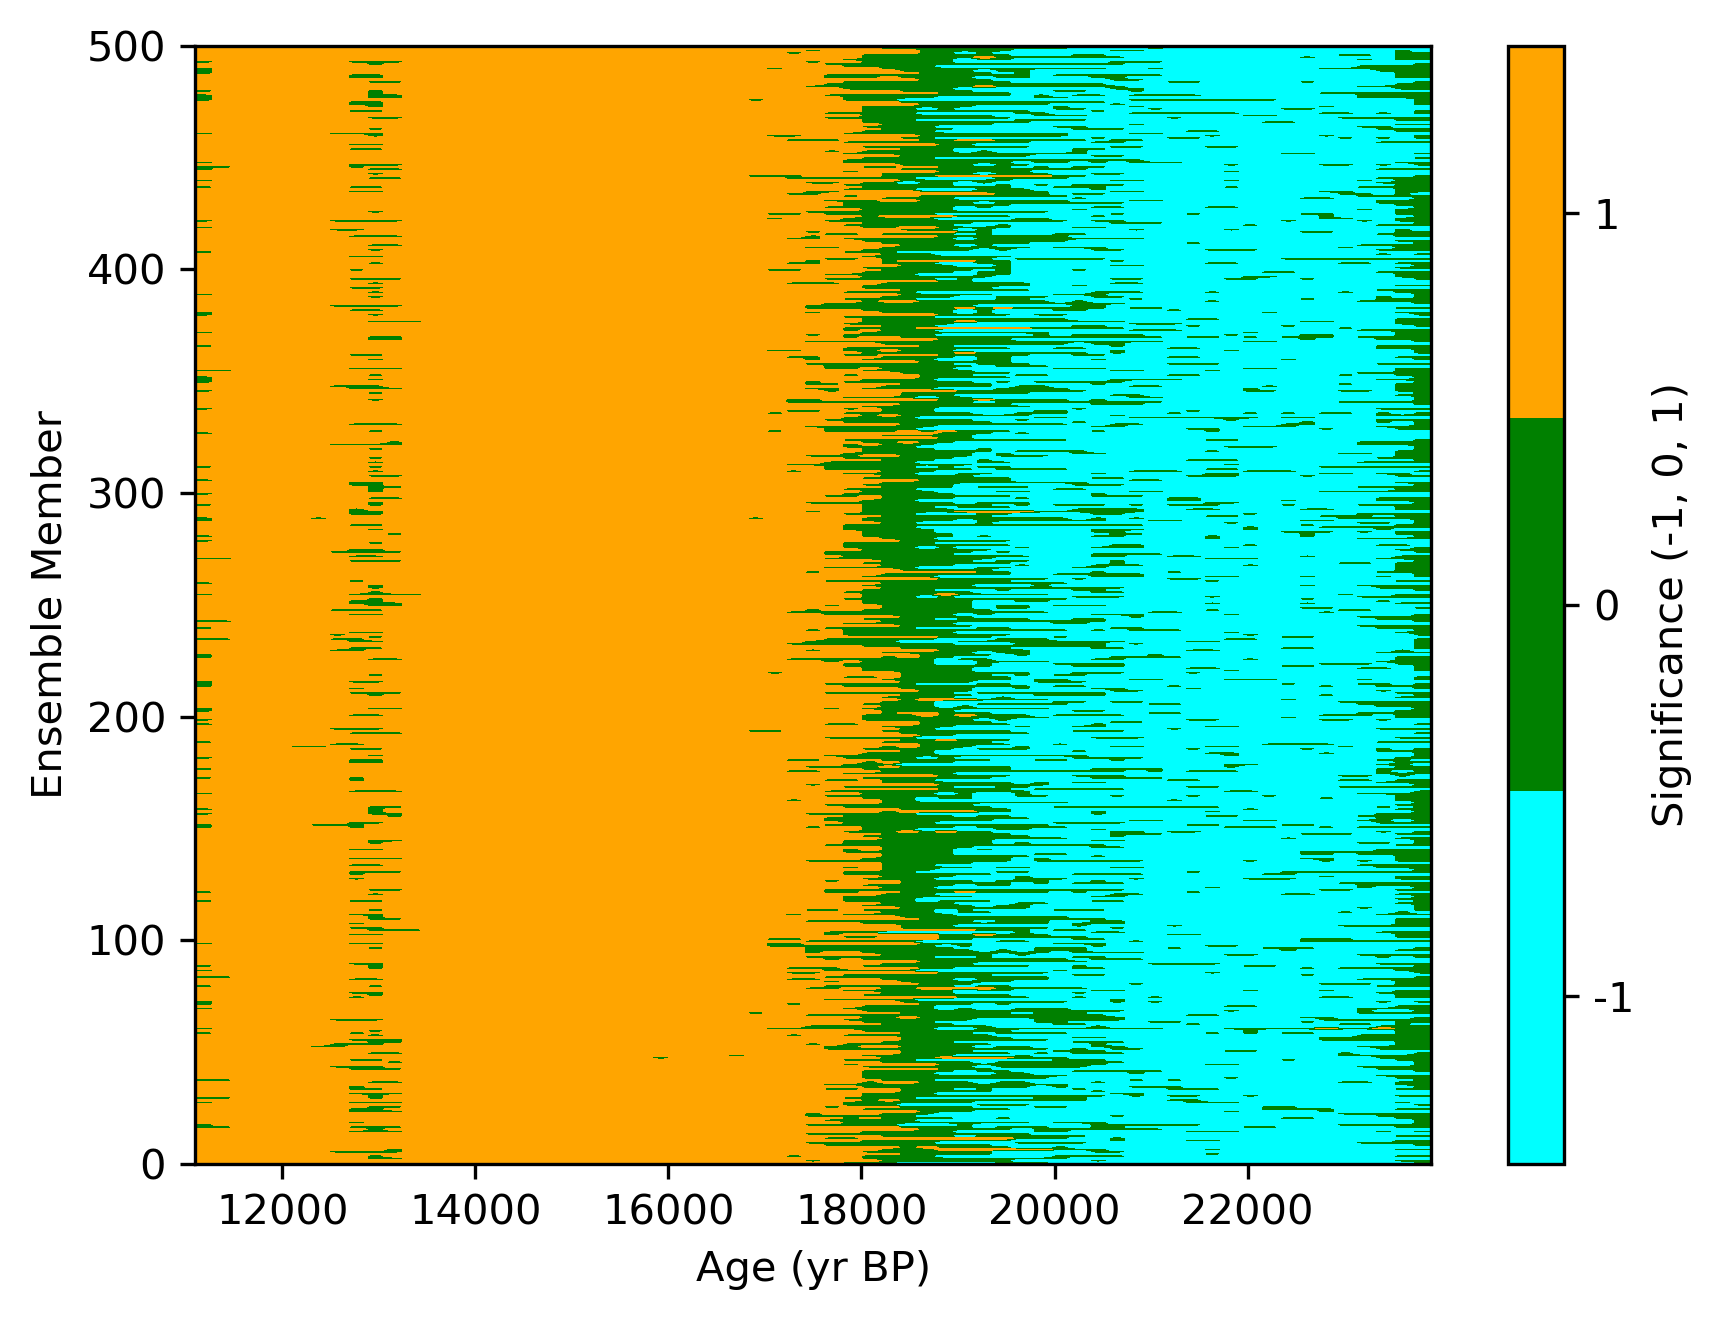

In [89]:
weighted_avg_curves_k = [curves[3] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing
significance_results = analyze_significance(weighted_avg_curves_k, sigmas)
plot_significance_map(significance_results, (time[0], time[-1]), len(weighted_avg_curves_k))

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import ttest_1samp

    

def smooth_gaussian(data, sigma):
    """
    Smooth a time series using a Gaussian kernel.
    """
    smoothed_data = gaussian_filter1d(data, sigma=sigma)
    return smoothed_data


sigmas = list(range(1, 20, 1))  # Sigma values for Gaussian smoothing

# Prepare to store all significance arrays
all_significance_arrays = []

for time_series in weighted_avg_curves_k:
    # print(len(time_series))
    derivatives_matrix = []
    original_derivative = np.gradient(time_series) * -1
    # derivatives_matrix.append(original_derivative)

    for sigma in sigmas:
        smoothed_data = smooth_gaussian(time_series, sigma)
        derivative = np.gradient(smoothed_data) * -1
        derivatives_matrix.append(derivative)

    derivatives_matrix = np.array(derivatives_matrix).T
    significance_array = np.zeros_like(time_series)

    for i in range(len(derivatives_matrix)):
        _, p_value = ttest_1samp(derivatives_matrix[i], 0)
        if p_value < 0.05:
            mean_derivative = np.mean(derivatives_matrix[i])
            if mean_derivative < 0:
                significance_array[i] = -1
            elif mean_derivative > 0:
                significance_array[i] = 1

    all_significance_arrays.append(significance_array)




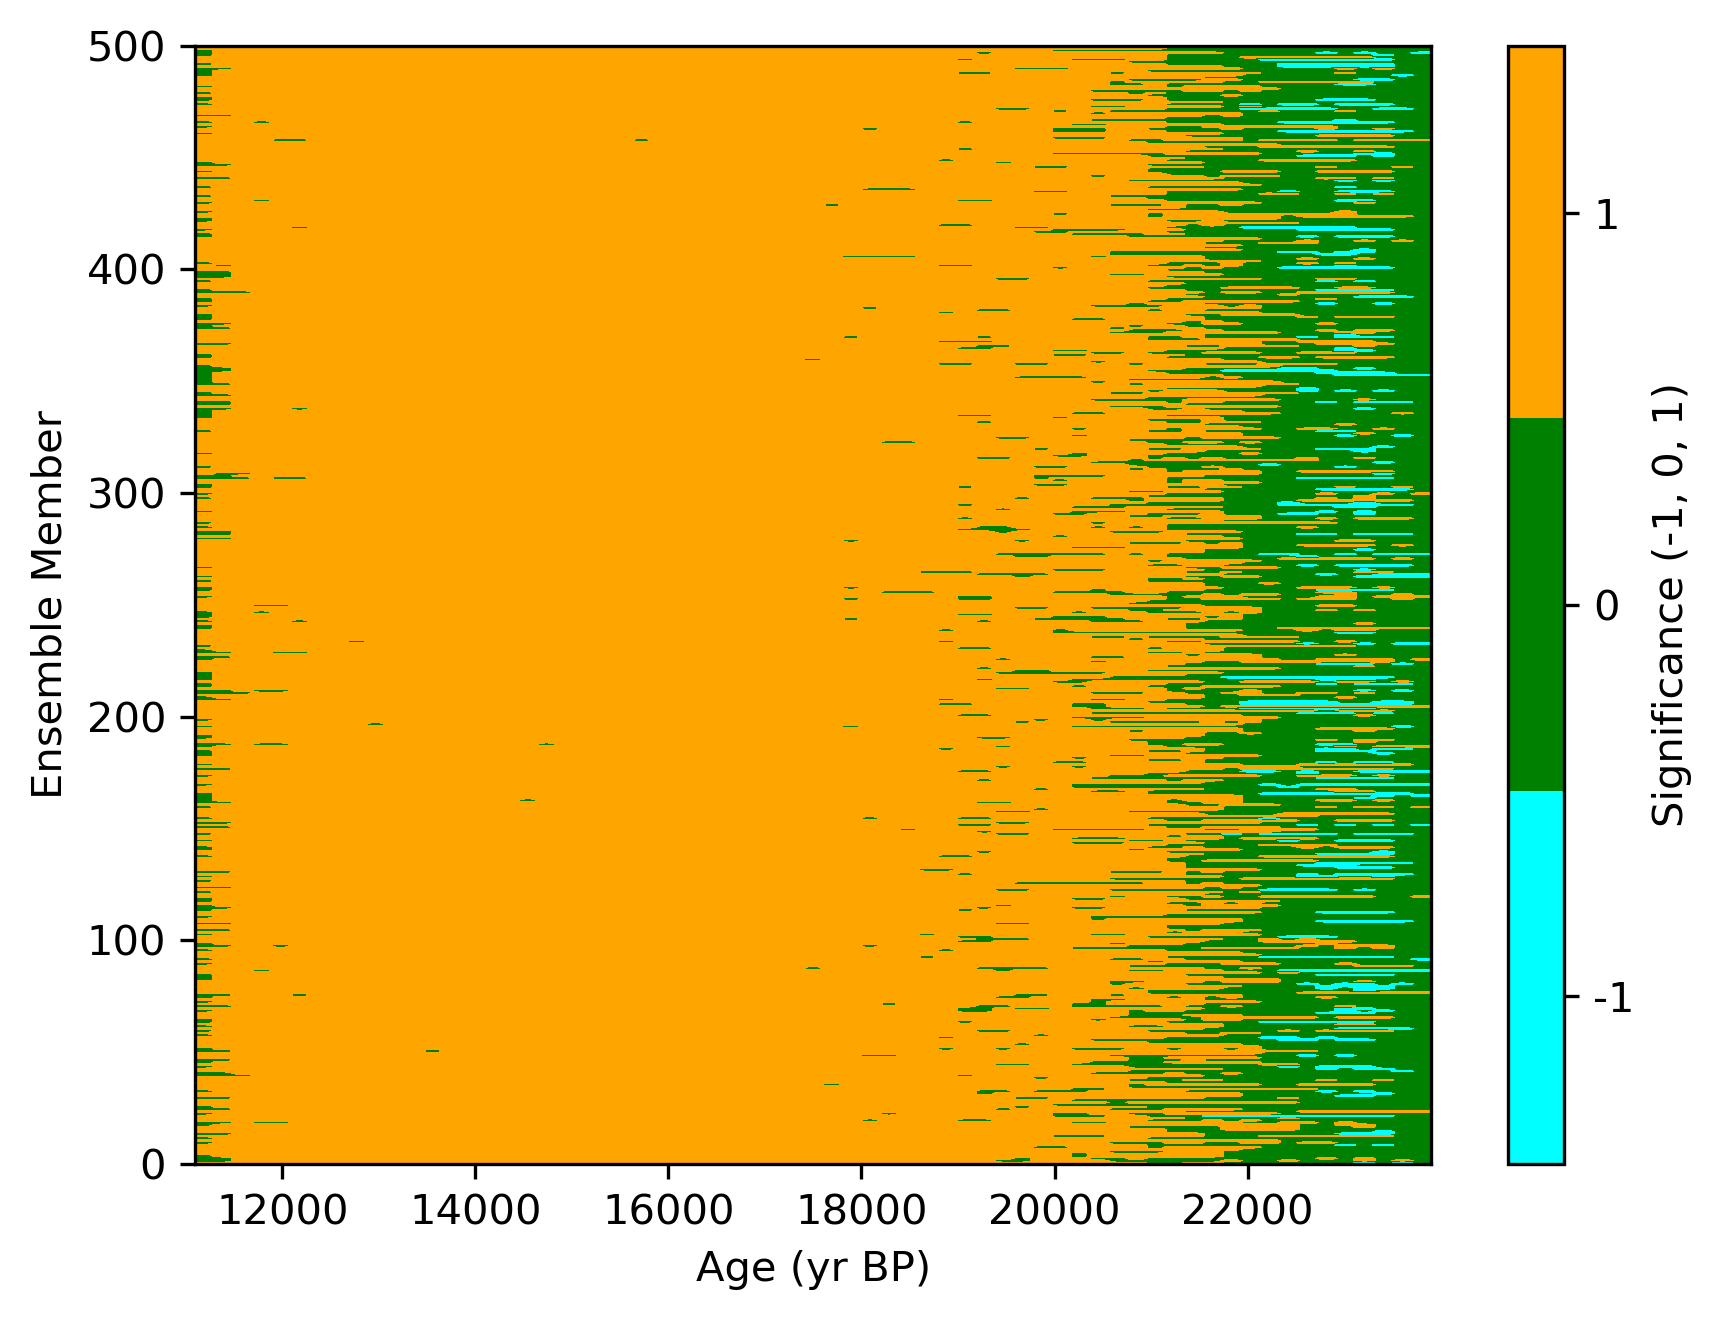

In [73]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Define custom colormap
colors = ['cyan', 'green', 'orange'] 
cmap = ListedColormap(colors)

# Plotting the 2D color map of significance results
plt.figure(figsize=(6, 4.5),dpi=300)
plt.imshow(all_significance_arrays, aspect='auto', cmap=cmap, extent=[np.min(time), np.max(time), 0, len(weighted_avg_curves_k)], vmin=-1, vmax=1)
cbar=plt.colorbar(ticks=[-0.7, 0, 0.7], label='Significance (-1, 0, 1)')
# set the tick labels for the color bar
cbar.set_ticklabels(['-1', '0', '1'])
# plt.title('2D Color Map of Significance Arrays')
plt.xlabel('Age (yr BP)')
plt.ylabel('Ensemble Member')
plt.tight_layout()
plt.show()

In [33]:
len(derivative)

65

In [36]:
len(derivatives_matrix[0])

20

In [29]:
len(derivatives_matrix[0])

20

In [28]:
len(derivatives_matrix[1])

20

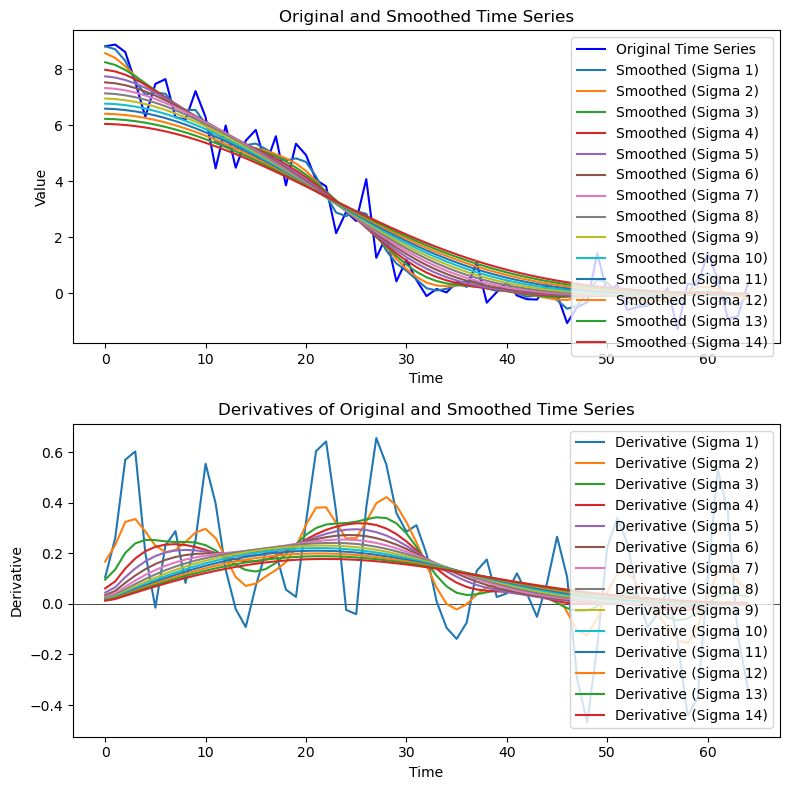

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def smooth_gaussian(data, sigma):
    """
    Smooth a time series using a Gaussian kernel.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        sigma (float): The standard deviation for Gaussian kernel, determines the amount of smoothing.
        
    Returns:
        smoothed_data (ndarray): The smoothed time series data.
    """
    smoothed_data = gaussian_filter1d(data, sigma=sigma)
    return smoothed_data

time_series = weighted_avg_curves_k[0]

# Define sigma values for Gaussian smoothing
sigmas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Plot original time series and derivatives
plt.figure(figsize=(8, 8))

# Plot original time series
plt.subplot(2, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')

# Plot smoothed time series for each sigma
for sigma in sigmas:
    smoothed_data = smooth_gaussian(time_series, sigma)
    plt.plot(smoothed_data, label=f'Smoothed (Sigma {sigma})')

plt.title('Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Calculate and plot derivatives
plt.subplot(2, 1, 2)
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
for sigma in sigmas:
    smoothed_data = smooth_gaussian(time_series, sigma)
    derivative = np.gradient(smoothed_data)*-1
    plt.plot(derivative, label=f'Derivative (Sigma {sigma})')

plt.title('Derivatives of Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Derivative')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17816\2806958532.py:36: RankWarning: Polyfit may be poorly conditioned
  smoothed_data = smooth_polynomial(time_series, order)
C:\Users\User\AppData\Local\Temp\ipykernel_17816\2806958532.py:36: RankWarning: Polyfit may be poorly conditioned
  smoothed_data = smooth_polynomial(time_series, order)
C:\Users\User\AppData\Local\Temp\ipykernel_17816\2806958532.py:49: RankWarning: Polyfit may be poorly conditioned
  smoothed_data = smooth_polynomial(time_series, order)
C:\Users\User\AppData\Local\Temp\ipykernel_17816\2806958532.py:49: RankWarning: Polyfit may be poorly conditioned
  smoothed_data = smooth_polynomial(time_series, order)


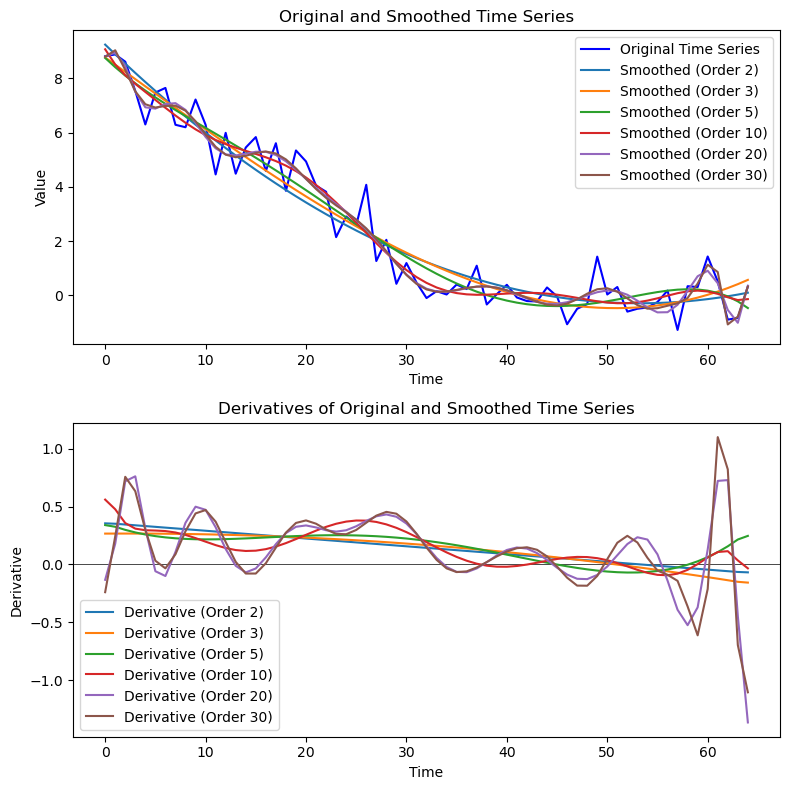

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_polynomial(data, order):
    """
    Smooth a time series using a polynomial of a given order.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        order (int): The order of the polynomial to use for smoothing.
        
    Returns:
        smoothed_data (ndarray): The smoothed time series data.
    """
    time = np.arange(len(data))
    coefficients = np.polyfit(time, data, order)
    polynomial = np.poly1d(coefficients)
    smoothed_data = polynomial(time)
    return smoothed_data


time_series = weighted_avg_curves_k[0]

# Define polynomial orders for smoothing
orders = [2, 3, 5, 10, 20, 30]

# Plot original time series and derivatives
plt.figure(figsize=(8, 8))

# Plot original time series
plt.subplot(2, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')

# Plot smoothed time series for each order
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    plt.plot(smoothed_data, label=f'Smoothed (Order {order})')

plt.title('Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
# plt.grid(True)

# Calculate and plot derivatives
plt.subplot(2, 1, 2)
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    derivative = np.gradient(smoothed_data)*-1
    plt.plot(derivative, label=f'Derivative (Order {order})')

plt.title('Derivatives of Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Derivative')
plt.legend()
# plt.grid(True)

plt.tight_layout()
plt.show()


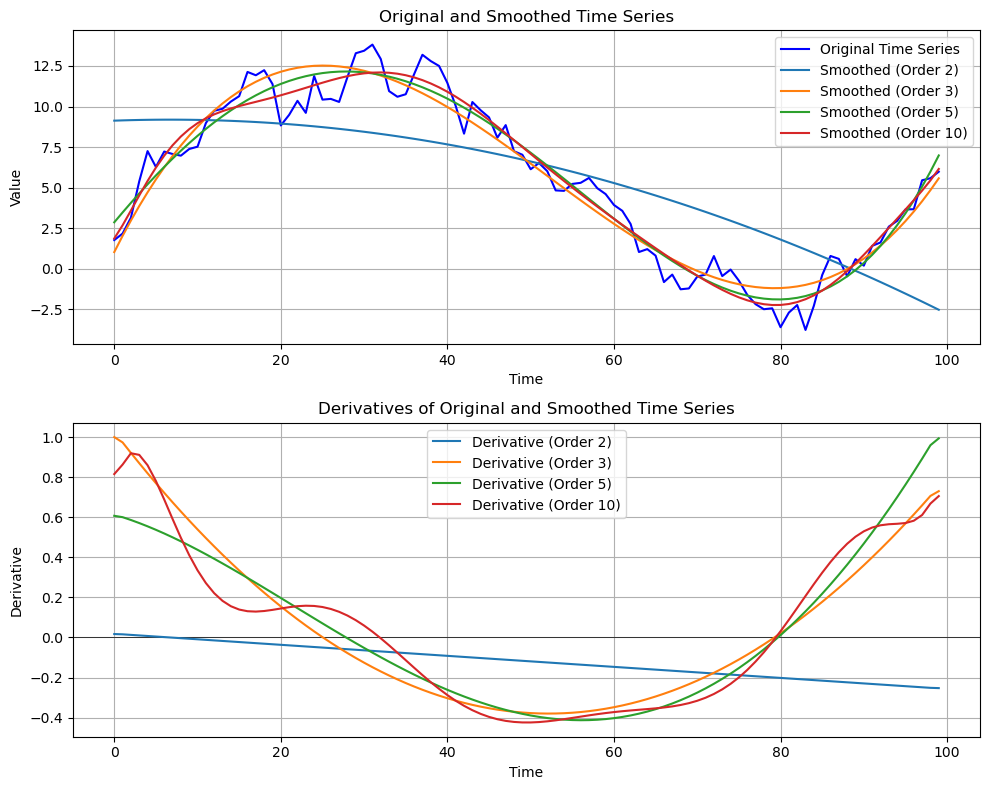

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_polynomial(data, order):
    """
    Smooth a time series using a polynomial of a given order.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        order (int): The order of the polynomial to use for smoothing.
        
    Returns:
        smoothed_data (ndarray): The smoothed time series data.
    """
    time = np.arange(len(data))
    coefficients = np.polyfit(time, data, order)
    polynomial = np.poly1d(coefficients)
    smoothed_data = polynomial(time)
    return smoothed_data

# Generate sample time series data
np.random.seed(0)
time_series = np.random.randn(100).cumsum()

# Define polynomial orders for smoothing
orders = [2, 3, 5, 10]

# Plot original time series and derivatives
plt.figure(figsize=(10, 8))

# Plot original time series
plt.subplot(2, 1, 1)
plt.plot(time_series, label='Original Time Series', color='blue')

# Plot smoothed time series for each order
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    plt.plot(smoothed_data, label=f'Smoothed (Order {order})')

plt.title('Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Calculate and plot derivatives
plt.subplot(2, 1, 2)
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    derivative = np.gradient(smoothed_data)
    plt.plot(derivative, label=f'Derivative (Order {order})')

plt.title('Derivatives of Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


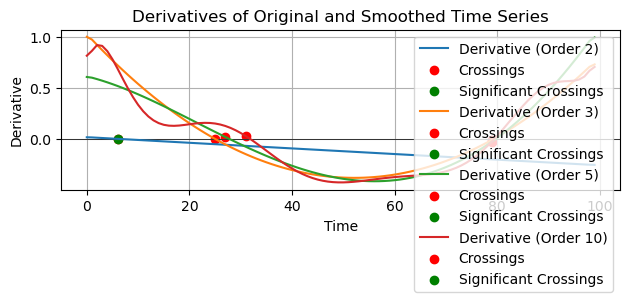

In [6]:
def find_crossings(derivative):
    """
    Find indices where the derivative changes sign (crosses zero).
    
    Parameters:
        derivative (ndarray): The derivative array.
        
    Returns:
        crossing_indices (list): List of indices where the derivative changes sign.
    """
    crossings = np.where(np.diff(np.sign(derivative)))[0]
    return crossings

# Calculate and plot derivatives
plt.subplot(2, 1, 2)
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    derivative = np.gradient(smoothed_data)
    plt.plot(derivative, label=f'Derivative (Order {order})')

    # Find crossings
    crossings = find_crossings(derivative)
    plt.scatter(crossings, derivative[crossings], color='red', label='Crossings')

    # Calculate confidence intervals (example with bootstrap)
    num_samples = 1000
    bootstrap_samples = []
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(derivative, size=len(derivative), replace=True)
        bootstrap_samples.append(np.mean(bootstrap_sample))
    bootstrap_mean = np.mean(bootstrap_samples)
    bootstrap_std = np.std(bootstrap_samples)
    confidence_interval = (bootstrap_mean - 1.96 * bootstrap_std, bootstrap_mean + 1.96 * bootstrap_std)

    # Highlight significant crossings
    significant_crossings = [idx for idx in crossings if derivative[idx] < confidence_interval[0] or derivative[idx] > confidence_interval[1]]
    plt.scatter(significant_crossings, derivative[significant_crossings], color='green', label='Significant Crossings')

plt.title('Derivatives of Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Derivative')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


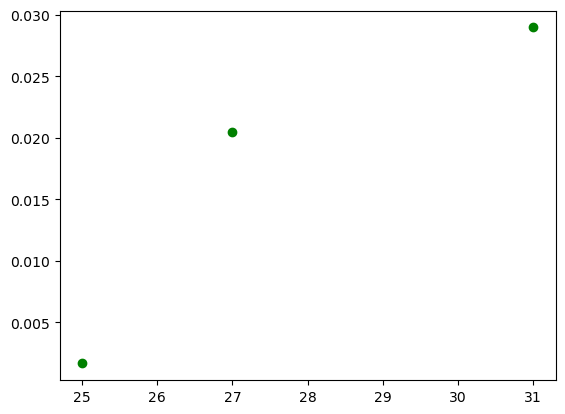

In [7]:
from statsmodels.regression.linear_model import OLS
from scipy.stats import chi2

def likelihood_ratio_test(data, idx):
    """
    Perform likelihood ratio test to assess significance of change point.
    
    Parameters:
        data (ndarray): The time series data.
        idx (int): Index of the potential change point.
        
    Returns:
        p_value (float): p-value of the likelihood ratio test.
    """
    n = len(data)
    n1 = idx
    n2 = n - idx
    
    # Fit model without change point
    model1 = OLS(data, np.ones((n, 1))).fit()
    RSS1 = model1.ssr
    
    # Fit model with change point
    model2 = OLS(data, np.concatenate([np.ones((n1, 1)), np.zeros((n2, 1))])).fit()
    RSS2 = model2.ssr
    
    # Calculate test statistic
    LR = (RSS1 - RSS2) / RSS2 * (n - 2)
    
    # Calculate p-value
    p_value = 1 - chi2.cdf(LR, 1)
    
    return p_value

# Perform change point analysis for each potential crossing point
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    derivative = np.gradient(smoothed_data)
    crossings = find_crossings(derivative)
    
    significant_crossings = []
    for crossing in crossings:
        p_value = likelihood_ratio_test(derivative, crossing)
        if p_value < 0.05:  # significance level of 0.05
            significant_crossings.append(crossing)
    
    # Plot significant crossings
    plt.scatter(significant_crossings, derivative[significant_crossings], color='green', label='Significant Crossings')


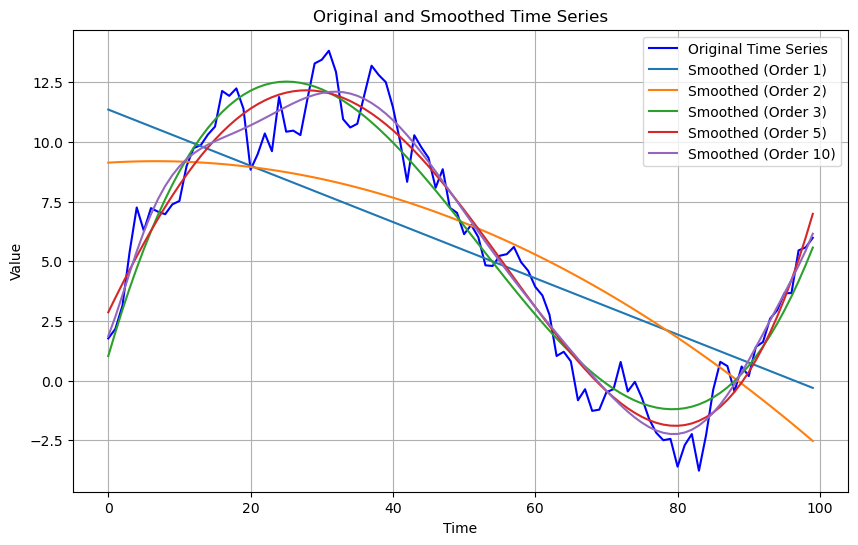

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def smooth_polynomial(data, order):
    """
    Smooth a time series using a polynomial of a given order.
    
    Parameters:
        data (array-like): The time series data to be smoothed.
        order (int): The order of the polynomial to use for smoothing.
        
    Returns:
        smoothed_data (ndarray): The smoothed time series data.
    """
    time = np.arange(len(data))
    coefficients = np.polyfit(time, data, order)
    polynomial = np.poly1d(coefficients)
    smoothed_data = polynomial(time)
    return smoothed_data

# Generate sample time series data
np.random.seed(0)
time_series = np.random.randn(100).cumsum()

# Define polynomial orders for smoothing
orders = [1,2, 3, 5, 10]

# Plot original time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Time Series', color='blue')

# Plot smoothed time series for each order
for order in orders:
    smoothed_data = smooth_polynomial(time_series, order)
    plt.plot(smoothed_data, label=f'Smoothed (Order {order})')

plt.title('Original and Smoothed Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


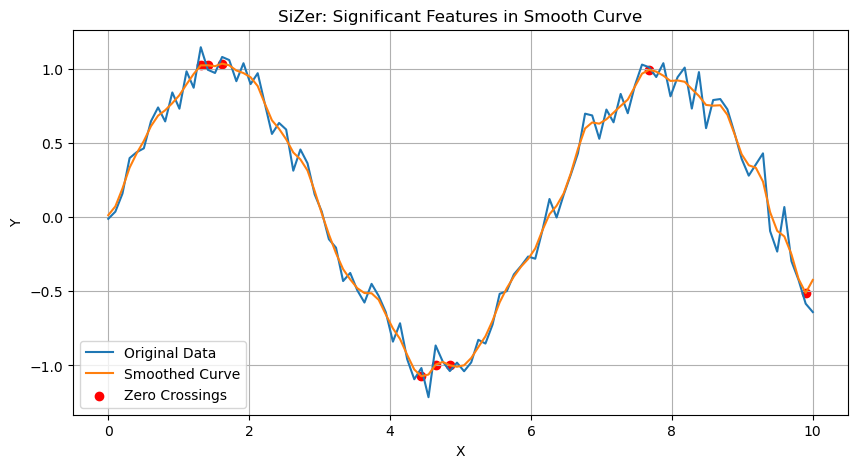

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)  # Smooth curve with noise

# Smooth the data using a Gaussian kernel
smoothed_y = np.convolve(y, norm.pdf(np.linspace(-2, 2, 5)), mode='same') / np.sum(norm.pdf(np.linspace(-2, 2, 5)))

# Calculate the first derivative of the smoothed curve
dy_dx = np.gradient(smoothed_y, x)

# Identify zero crossings of the first derivative
zero_crossings = np.where(np.diff(np.sign(dy_dx)))[0]

# Plot the original data and the smoothed curve
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Original Data')
plt.plot(x, smoothed_y, label='Smoothed Curve')
plt.scatter(x[zero_crossings], smoothed_y[zero_crossings], color='red', label='Zero Crossings')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SiZer: Significant Features in Smooth Curve')
plt.legend()
plt.grid(True)
plt.show()


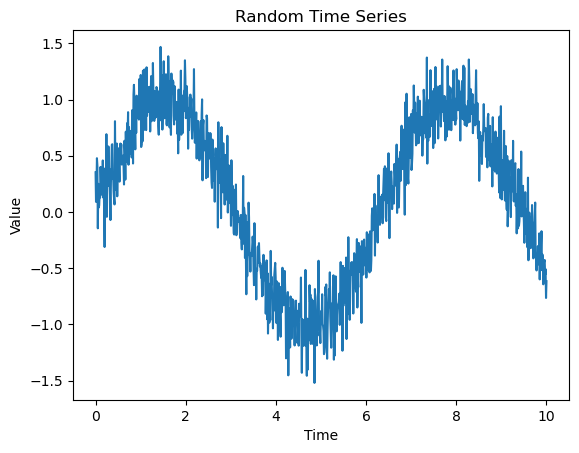

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a random time series
np.random.seed(0)  # for reproducibility
n = 1000
x = np.linspace(0, 10, n)
y = np.sin(x) + np.random.normal(scale=0.2, size=n)

# Plotting the time series
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Random Time Series')
plt.show()


In [5]:
import numpy as np
from scipy.stats import linregress

def SiZer(x, y, h=None, x_grid=None, degree=None, derv=1, grid_length=41, quiet=True):
    
    def x_grid_create(x_grid, x, y, grid_length):
        if x_grid is None:
            return np.linspace(np.min(x), np.max(x), grid_length)
        elif isinstance(x_grid, int):
            return np.linspace(np.min(x), np.max(x), x_grid)
        elif len(x_grid) == 2:
            return np.linspace(x_grid[0], x_grid[1], grid_length)
        else:
            return np.array(x_grid)

    def h_grid_create(h, x, y, grid_length):
        if h is None:
            return np.linspace(0.5, 10, grid_length)
        elif isinstance(h, int):
            return np.linspace(0.5, 10, h)
        elif len(h) == 2:
            return np.linspace(h[0], h[1], grid_length)
        else:
            return np.array(h)

    def locally_weighted_polynomial(x, y, h, x_grid, degree):
        y_pred = np.zeros_like(x_grid)
        for i, x0 in enumerate(x_grid):
            weights = np.exp(-(x - x0) ** 2 / (2 * h ** 2))
            X = np.vander(x, degree + 1)
            W = np.diag(weights)
            coef = np.linalg.solve(X.T @ W @ X, X.T @ W @ y)
            y_pred[i] = np.dot(np.vander([x0], degree + 1), coef)
        return y_pred

    def find_states(intervals):
        slopes = np.zeros(len(intervals))
        for i, interval in enumerate(intervals):
            if interval[0] > 0:
                slopes[i] = 1
            elif interval[1] < 0:
                slopes[i] = -1
            else:
                slopes[i] = 0
        return slopes

    x_grid = x_grid_create(x_grid, x, y, grid_length)
    h_grid = h_grid_create(h, x, y, grid_length)

    if degree is None:
        degree = derv + 1

    slopes = np.zeros((len(h_grid), len(x_grid)))
    for i, h in enumerate(h_grid):
        if not quiet:
            print(f"Now calculating h={h}")
        y_pred = locally_weighted_polynomial(x, y, h, x_grid, degree)
        intervals = []
        for j in range(len(x_grid)):
            start = max(0, j - 10)
            end = min(len(x) - 1, j + 10)
            interval = linregress(x[start:end], y_pred[start:end])
            intervals.append((interval.slope - interval.stderr, interval.slope + interval.stderr))
        slopes[i] = find_states(intervals)

    return {"x_grid": x_grid, "h_grid": h_grid, "slopes": slopes}

# Example usage
# x = np.array(...)
# y = np.array(...)
# SiZer_result = SiZer(x, y, h=(0.5, 10), degree=1, derv=1, grid_length=21)
# print(SiZer_result)


In [7]:
SiZer_result = SiZer(x, y, h=(0.5, 10), degree=1, derv=1, grid_length=21)
print(SiZer_result)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 20 and the array at index 1 has size 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def SiZer(x, y, h=None, x_grid=None, degree=None, derv=1, grid_length=41, quiet=True):
    def x_grid_create(x_grid, x, y, grid_length):
        if x_grid is None:
            x_grid = np.linspace(np.min(x), np.max(x), grid_length)
        elif len(x_grid) == 1:
            x_grid = np.linspace(np.min(x), np.max(x), x_grid)
        elif len(x_grid) == 2:
            x_grid = np.linspace(x_grid[0], x_grid[1], grid_length)
        return x_grid

    def h_grid_create(h_grid, x, y, grid_length):
        h_max = np.diff(np.sort(x)).max() * 2
        h_min = np.diff(np.sort(x)).min()
        if h_grid is None:
            h_grid = np.logspace(np.log10(h_min), np.log10(h_max), grid_length)
        elif len(h_grid) == 1:
            h_grid = np.logspace(np.log10(h_min), np.log10(h_max), h_grid)
        elif len(h_grid) == 2:
            h_grid = np.logspace(np.log10(h_grid[0]), np.log10(h_grid[1]), grid_length)
        return h_grid

    def locally_weighted_polynomial(x, y, h, x_grid, degree):
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(x[:, np.newaxis])
        log_dens = kde.score_samples(x_grid[:, np.newaxis])
        smoothed_y = np.convolve(y, norm.pdf(x_grid, scale=h) * np.exp(log_dens), mode='same') / \
                      np.convolve(np.ones_like(y), norm.pdf(x_grid, scale=h) * np.exp(log_dens), mode='same')
        return smoothed_y

    def calc_CI_locally_weighted_polynomial(model, derv):
        # Implementation needed based on your specific method

    def find_states(intervals):
        # Implementation needed based on your specific method

        x_grid = x_grid_create(x_grid, x, y, grid_length)
        h_grid = h_grid_create(h, x, y, grid_length)

        if degree is None:
            degree = derv + 1

        slopes = np.zeros((len(h_grid), len(x_grid)))
        for i, h in enumerate(h_grid):
            if not quiet:
                print(f'Now calculating h={h}')
            smoothed_y = locally_weighted_polynomial(x, y, h, x_grid, degree)
            intervals = calc_CI_locally_weighted_polynomial(smoothed_y, derv)
            slopes[i, :] = find_states(intervals)

        return {'x_grid': x_grid, 'h_grid': h_grid, 'slopes': slopes}

def plot_SiZer(x, y_label='log10(h)', colorlist=['red', 'purple', 'blue', 'grey'], ggplot2=False, **kwargs):
    if ggplot2:
        # Implementation needed based on your specific method
        pass
    else:
        slopes = x['slopes']
        final_colorlist = [color for color, value in zip(colorlist, np.unique(slopes)) if str(value) in ['-1', '0', '1', '2']]
        plt.imshow(slopes, extent=[x['x_grid'].min(), x['x_grid'].max(), np.log10(x['h_grid']).min(), np.log10(x['h_grid']).max()], aspect='auto', cmap=plt.get_cmap('viridis'))
        plt.colorbar(label='Class')
        plt.ylabel(y_label)
        plt.xlabel('x')
        plt.title('SiZer Map')
        x_midpoint = np.diff([x['x_grid'].min(), x['x_grid'].max()]) / 2 + x['x_grid'].min()
        for h in x['h_grid']:
            plt.plot([x_midpoint + h, x_midpoint - h], [np.log10(h), np.log10(h)], color='white')
        plt.show()

# Usage examples:
# SiZer_map = SiZer(x, y, h=[0.5, 10], degree=1, derv=1, grid_length=21)
# plot_SiZer(SiZer_map)


IndentationError: expected an indented block (991571325.py, line 38)

IndexError: index 1 is out of bounds for axis 0 with size 1

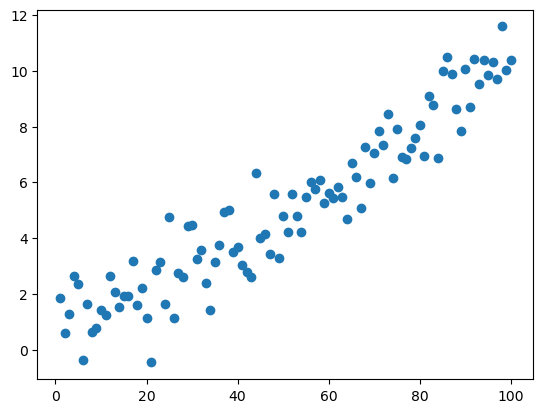

In [4]:
import numpy as np
import statsmodels.api as sm

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=1, size=100) + 0.1 * time  # Trend with noise






# Initialize arrays to store results
trend_significance = np.zeros_like(values, dtype=str)  # Stores '+' for positive trend, '-' for negative trend, '0' for no significant trend
p_values = np.zeros_like(values)

# Test each point for trend significance
for i in range(len(values)):
    # Fit linear regression model up to the current point
    X = sm.add_constant(time[:i+1])
    model = sm.OLS(values[:i+1], X)
    results = model.fit()
    
    # Get slope coefficient and p-value
    slope = results.params[1]
    p_value = results.pvalues[1]
    
    # Determine trend significance
    if p_value < 0.05:
        if slope > 0:
            trend_significance[i] = '+'
        elif slope < 0:
            trend_significance[i] = '-'
    else:
        trend_significance[i] = '0'
    
    p_values[i] = p_value

# Print trend significance for each point
for i, trend in enumerate(trend_significance):
    print(f"Time {i+1}: {trend} (p-value: {p_values[i]:.4f})")



Time 1:  (p-value: 0.0000)
Time 2: 0 (p-value: nan)
Time 3: 0 (p-value: 0.6938)
Time 4: 0 (p-value: 0.5520)
Time 5: 0 (p-value: 0.3021)
Time 6: 0 (p-value: 0.6855)
Time 7: 0 (p-value: 0.8123)
Time 8: 0 (p-value: 0.5568)
Time 9: 0 (p-value: 0.4254)
Time 10: 0 (p-value: 0.5140)
Time 11: 0 (p-value: 0.5336)
Time 12: 0 (p-value: 0.8958)
Time 13: 0 (p-value: 0.6662)
Time 14: 0 (p-value: 0.6614)
Time 15: 0 (p-value: 0.5204)
Time 16: 0 (p-value: 0.4136)
Time 17: 0 (p-value: 0.1489)
Time 18: 0 (p-value: 0.1762)
Time 19: 0 (p-value: 0.1228)
Time 20: 0 (p-value: 0.2223)
Time 21: 0 (p-value: 0.8234)
Time 22: 0 (p-value: 0.4931)
Time 23: 0 (p-value: 0.2413)
Time 24: 0 (p-value: 0.2601)
Time 25: 0 (p-value: 0.0646)
Time 26: 0 (p-value: 0.1175)
Time 27: 0 (p-value: 0.0741)
Time 28: 0 (p-value: 0.0506)
Time 29: + (p-value: 0.0137)
Time 30: + (p-value: 0.0036)
Time 31: + (p-value: 0.0018)
Time 32: + (p-value: 0.0007)
Time 33: + (p-value: 0.0008)
Time 34: + (p-value: 0.0027)
Time 35: + (p-value: 0.0015

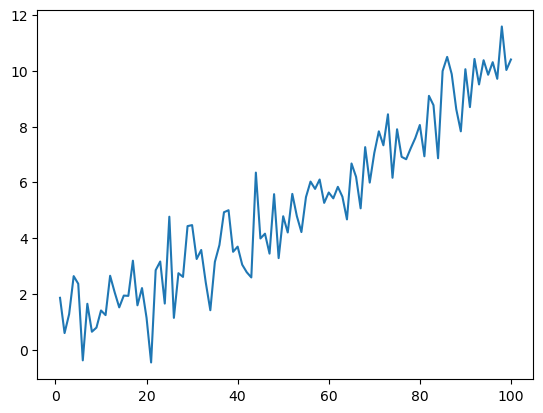

In [6]:
import numpy as np
import statsmodels.api as sm

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=1, size=100) + 0.1 * time  # Trend with noise


# plot the data
import matplotlib.pyplot as plt
plt.plot(time, values)


# Initialize arrays to store results
trend_significance = np.zeros_like(values, dtype=str)  # Stores '+' for positive trend, '-' for negative trend, '0' for no significant trend
p_values = np.zeros_like(values)

# Test each point for trend significance
for i in range(len(values)):
    if i == 0:  # Skip the first point as we can't fit a regression model with only one point
        continue
    
    # Fit linear regression model up to the current point
    X = sm.add_constant(time[:i+1])
    model = sm.OLS(values[:i+1], X)
    try:
        results = model.fit()
    except np.linalg.LinAlgError:
        continue
    
    # Get slope coefficient and p-value
    slope = results.params[1]
    p_value = results.pvalues[1]
    
    # Determine trend significance
    if p_value < 0.05:
        if slope > 0:
            trend_significance[i] = '+'
        elif slope < 0:
            trend_significance[i] = '-'
    else:
        trend_significance[i] = '0'
    
    p_values[i] = p_value

# Print trend significance for each point
for i, trend in enumerate(trend_significance):
    print(f"Time {i+1}: {trend} (p-value: {p_values[i]:.4f})")


2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78


ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

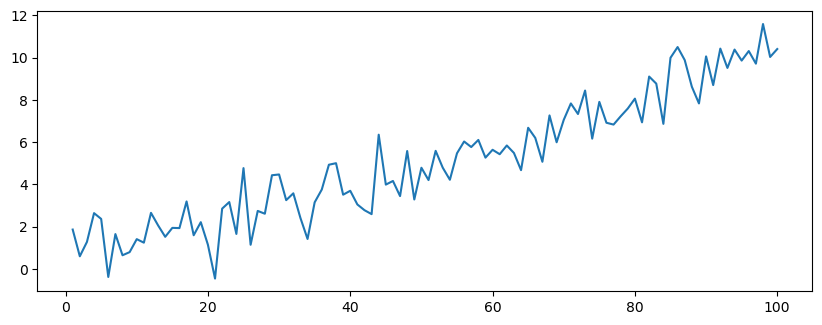

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=1, size=100) + 0.1 * time  # Trend with noise

# Define smoothing lengths
smoothing_lengths = np.arange(5, 31, 5)

# Initialize arrays to store results
trend_significance = np.zeros((len(smoothing_lengths), len(values)), dtype=str)  # Stores '+' for positive trend, '-' for negative trend, '0' for no significant trend
p_values = np.zeros((len(smoothing_lengths), len(values)))

# Test each point for trend significance for original and smoothed versions
for i, length in enumerate(smoothing_lengths):
    smoothed_values = np.convolve(values, np.ones(length)/length, mode='valid')
    time_smoothed = np.arange(length//2 + 1, len(values) - length//2 + 1)
    
    for j in range(len(smoothed_values)):
        if j == 0:  # Skip the first point as we can't fit a regression model with only one point
            continue
        
        # Fit linear regression model up to the current point
        X = time_smoothed[:j+1]
        y = smoothed_values[:j+1]

        # prin the length of x and y
        print(len(X), len(y))

#         model = sm.OLS(y, X)
#         try:
#             results = model.fit()
#         except np.linalg.LinAlgError:
#             continue

#         # Get slope coefficient and p-value
#         slope = results.params
#         p_value = results.pvalues

#         # Determine trend significance
#         if p_value < 0.05:
#             if slope > 0:
#                 trend_significance[i, j] = '+'
#             elif slope < 0:
#                 trend_significance[i, j] = '-'
#         else:
#             trend_significance[i, j] = '0'

#         p_values[i, j] = p_value

# Plot original time series and smoothed versions
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(time, values, label='Original Time Series')
for i, length in enumerate(smoothing_lengths):
    plt.plot(time[length//2:len(values) - length//2 + 1], np.convolve(values, np.ones(length)/length, mode='valid'), label=f'Smoothed (Length={length})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# # Create 2D colormap plot for trend significance
# plt.subplot(2, 1, 2)
# plt.imshow(np.flipud(MinMaxScaler().fit_transform(np.where(trend_significance == '+', 1, np.where(trend_significance == '-', -1, 0)))), cmap='coolwarm', aspect='auto')
# plt.xlabel('Time')
# plt.ylabel('log(Smoothing Length)')
# plt.yticks(np.arange(len(smoothing_lengths)), np.log(smoothing_lengths))
# plt.colorbar(label='Trend Significance')
# plt.tight_layout()
# plt.show()


100
100
100
100
100
100
100
100
100
100


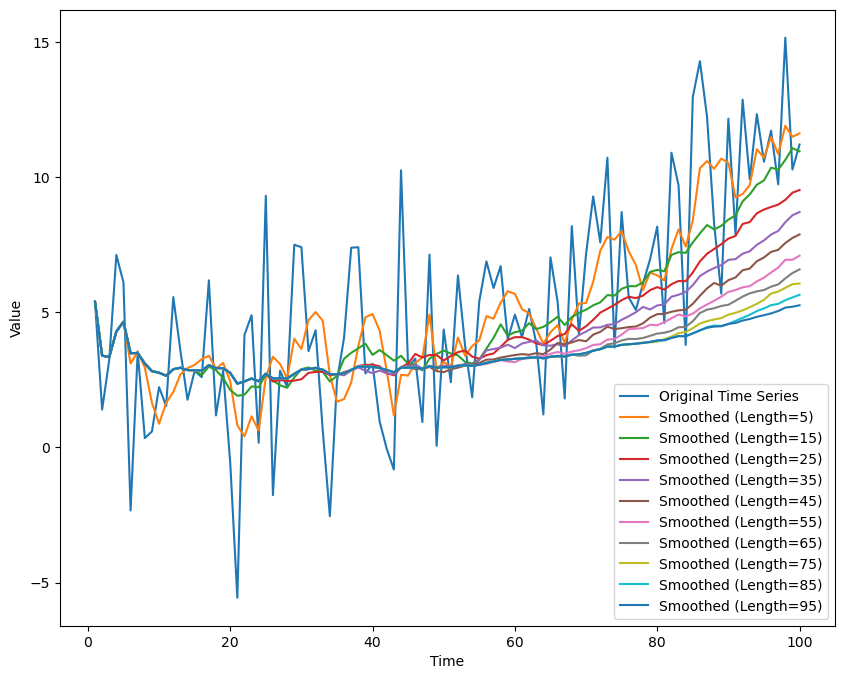

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=3, size=100) + 0.1 * time  # Trend with noise

# Define smoothing lengths
smoothing_lengths = np.arange(5, 101, 10)

# Initialize arrays to store results
smoothed_values_all = []

# Perform smoothing for each length
for length in smoothing_lengths:
    # Perform moving average smoothing using rolling function
    smoothed_values = pd.Series(values).rolling(window=length, min_periods=1).mean().values

    # print the length of smoothed values
    print(len(smoothed_values))
    
    # Store smoothed values
    smoothed_values_all.append(smoothed_values)

# Plot original time series and smoothed versions
plt.figure(figsize=(10, 8))
plt.plot(time, values, label='Original Time Series')
for i, length in enumerate(smoothing_lengths):
    plt.plot(time, smoothed_values_all[i], label=f'Smoothed (Length={length})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


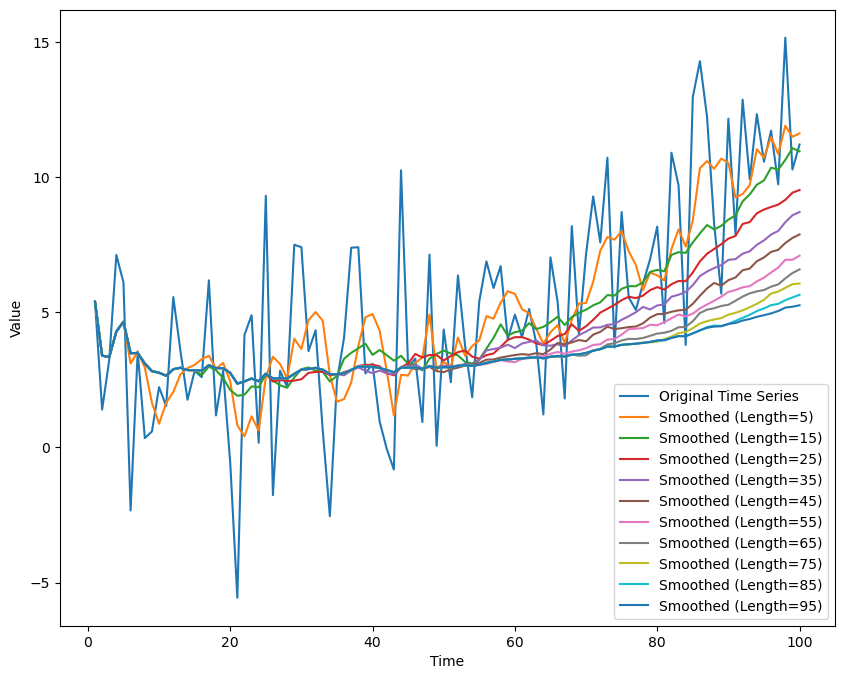

TypeError: Image data of dtype <U1 cannot be converted to float

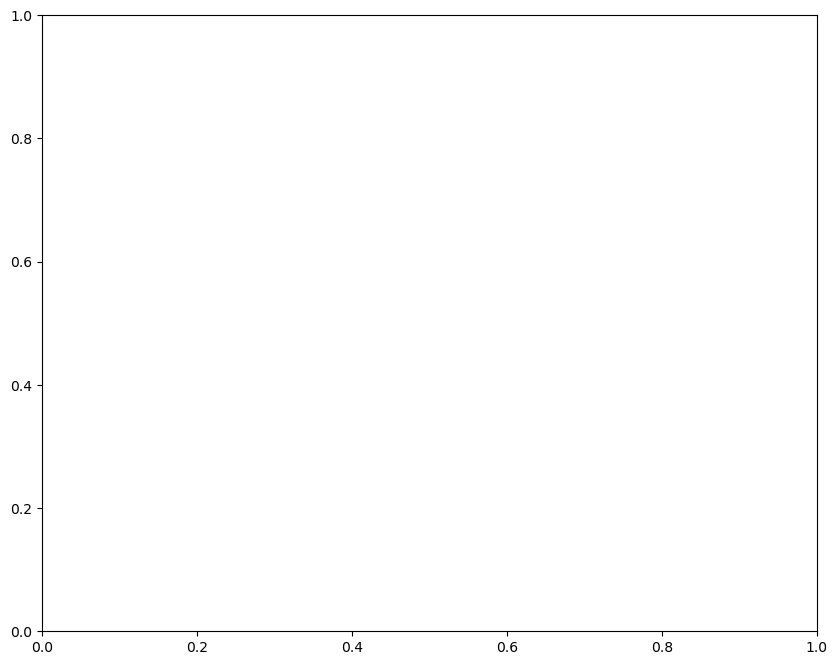

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=3, size=100) + 0.1 * time  # Trend with noise

# Define smoothing lengths
smoothing_lengths = np.arange(5, 101, 10)

# Initialize arrays to store results
smoothed_values_all = []
trend_significance_all = []

# Perform smoothing for each length
for length in smoothing_lengths:
    # Perform moving average smoothing using rolling function
    smoothed_values = pd.Series(values).rolling(window=length, min_periods=1).mean().values

    # Fit linear regression model to calculate trend
    X = time.reshape(-1, 1)
    y = smoothed_values
    model = LinearRegression()
    model.fit(X, y)

    # Calculate residuals
    residuals = y - model.predict(X)

    # Calculate standard error of the slope
    mse = np.sum(residuals ** 2) / (len(X) - 2)
    se_slope = np.sqrt(mse / np.sum((X - np.mean(X)) ** 2))

    # Calculate t-value for the slope
    t_value = model.coef_[0] / se_slope

    # Calculate p-value
    p_value = 2 * (1 - t.cdf(np.abs(t_value), len(X) - 2))

    # Determine trend significance
    if p_value < 0.05:
        if model.coef_[0] > 0:
            trend_significance_all.append('+')
        elif model.coef_[0] < 0:
            trend_significance_all.append('-')
    else:
        trend_significance_all.append('0')

    # Store smoothed values
    smoothed_values_all.append(smoothed_values)

# Plot original time series and smoothed versions
plt.figure(figsize=(10, 8))
plt.plot(time, values, label='Original Time Series')
for i, length in enumerate(smoothing_lengths):
    plt.plot(time, smoothed_values_all[i], label=f'Smoothed (Length={length})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot 2D color map for trend significance
plt.figure(figsize=(10, 8))
plt.imshow(np.flipud(np.array(trend_significance_all).reshape(len(smoothing_lengths), -1)), cmap='coolwarm', aspect='auto')
plt.xlabel('Time')
plt.ylabel('Smoothing Length')
plt.xticks(ticks=np.arange(len(time))[::10], labels=time[::10])
plt.yticks(ticks=np.arange(len(smoothing_lengths)), labels=smoothing_lengths)
plt.colorbar(label='Trend Significance')
plt.show()


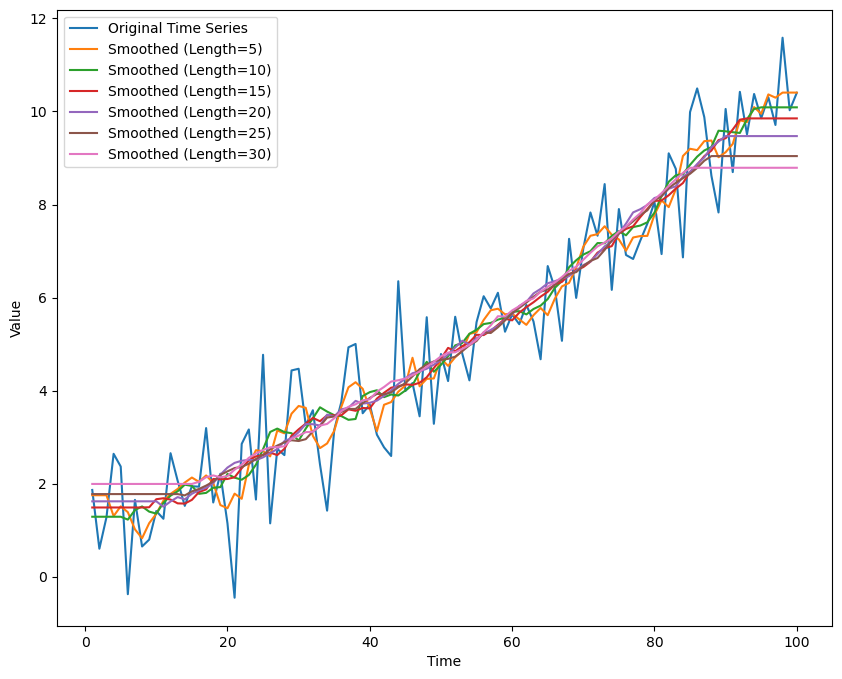

In [18]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=1, size=100) + 0.1 * time  # Trend with noise

# Define smoothing lengths
smoothing_lengths = np.arange(5, 31, 5)

# Initialize arrays to store results
smoothed_values_all = []

# Perform smoothing for each length
for length in smoothing_lengths:
    # Perform moving average smoothing
    smoothed_values = np.convolve(values, np.ones(length)/length, mode='valid')
    
    # Pad the unsmoothed points at the edges to match the original data length
    pad_left = (length - 1) // 2
    pad_right = length // 2
    smoothed_values = np.concatenate((np.full(pad_left, smoothed_values[0]), smoothed_values, np.full(pad_right, smoothed_values[-1])))
    
    # Store smoothed values
    smoothed_values_all.append(smoothed_values)

# Plot original time series and smoothed versions
plt.figure(figsize=(10, 8))
plt.plot(time, values, label='Original Time Series')
for i, length in enumerate(smoothing_lengths):
    plt.plot(time, smoothed_values_all[i], label=f'Smoothed (Length={length})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78


ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

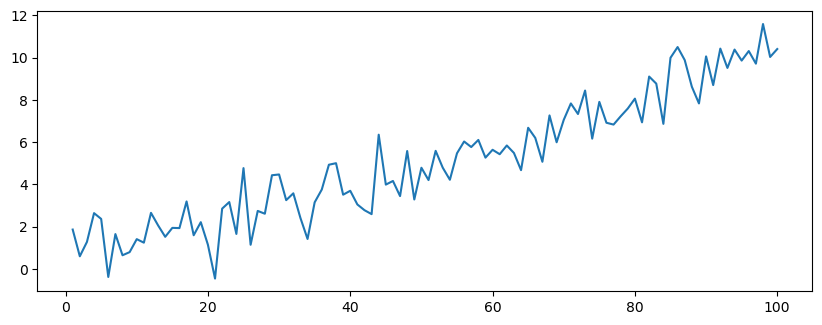

In [17]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Generate random time series data
np.random.seed(0)
time = np.arange(1, 101)
values = np.random.normal(loc=0, scale=1, size=100) + 0.1 * time  # Trend with noise

# Define smoothing lengths
smoothing_lengths = np.arange(5, 31, 5)

# Initialize arrays to store results
trend_significance = np.zeros((len(smoothing_lengths), len(values)), dtype=str)  # Stores '+' for positive trend, '-' for negative trend, '0' for no significant trend
p_values = np.zeros((len(smoothing_lengths), len(values)))

# Test each point for trend significance for original and smoothed versions
for i, length in enumerate(smoothing_lengths):
    smoothed_values = np.convolve(values, np.ones(length)/length, mode='valid')
    time_smoothed = np.arange(length//2 + 1, len(values) - length//2 + 1)
    
    for j in range(len(smoothed_values)):
        if j == 0:  # Skip the first point as we can't fit a regression model with only one point
            continue
        
        # Fit linear regression model up to the current point
        X = time_smoothed[:j+1]
        y = smoothed_values[:j+1]

        # prin the length of x and y
        print(len(X), len(y))

#         model = sm.OLS(y, X)
#         try:
#             results = model.fit()
#         except np.linalg.LinAlgError:
#             continue

#         # Get slope coefficient and p-value
#         slope = results.params
#         p_value = results.pvalues

#         # Determine trend significance
#         if p_value < 0.05:
#             if slope > 0:
#                 trend_significance[i, j] = '+'
#             elif slope < 0:
#                 trend_significance[i, j] = '-'
#         else:
#             trend_significance[i, j] = '0'

#         p_values[i, j] = p_value

# Plot original time series and smoothed versions
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(time, values, label='Original Time Series')
for i, length in enumerate(smoothing_lengths):
    plt.plot(time[length//2:len(values) - length//2 + 1], np.convolve(values, np.ones(length)/length, mode='valid'), label=f'Smoothed (Length={length})')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# # Create 2D colormap plot for trend significance
# plt.subplot(2, 1, 2)
# plt.imshow(np.flipud(MinMaxScaler().fit_transform(np.where(trend_significance == '+', 1, np.where(trend_significance == '-', -1, 0)))), cmap='coolwarm', aspect='auto')
# plt.xlabel('Time')
# plt.ylabel('log(Smoothing Length)')
# plt.yticks(np.arange(len(smoothing_lengths)), np.log(smoothing_lengths))
# plt.colorbar(label='Trend Significance')
# plt.tight_layout()
# plt.show()
